#1.-Carga de dataset.

En resumen: El dataset parece ser un registro detallado de auditorías y analisis de causo de no confomidade de una planta de alimentos tomados del fines del 2019 al 2025, incluyendo información sobre su estado, fechas clave de creación y finalización, el área auditada, la persona auditada, y los análisis de causa. Es un dataset rico en información que te permitirá explorar patrones, eficiencias y posibles cuellos de botella en los procesos de auditoría.

In [ ]:
import pandas as pd
import requests
from tabulate import tabulate
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected URL to point to the raw Excel file content on GitHub
url = "https://raw.githubusercontent.com/witman92/Taller-Final-Visualizaci-n-Datos-/refs/heads/main/Registo%20exportado%20de%20sap%20de%20analis%20causa%202019-2025.XLSX"
try:
    response = requests.get(url)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    excel_data = io.BytesIO(response.content)
    df = pd.read_excel(excel_data)

    print(f"\nNúmero de filas: {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}")

    print("\nInformación de las columnas y tipos de datos:\n")
    df.info()
except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo: {e}")
except Exception as e:
    print(f"Ocurrió un error: {e}")
    print("\nInformación de las columnas y tipos de datos:\n")
print("Primeras 5 filas del DataFrame:\n")
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))


Número de filas: 8320
Número de columnas: 18

Información de las columnas y tipos de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Auditoría                           8320 non-null   object        
 1   Denominación                        6930 non-null   object        
 2   Status                              8320 non-null   object        
 3   Creado                              8320 non-null   datetime64[ns]
 4   No Conformidad                      8320 non-null   int64         
 5   Acción Correctiva Inmediata         7861 non-null   object        
 6   Seguimiento                         7253 non-null   object        
 7   Debe finalizar                      8242 non-null   datetime64[ns]
 8   Area                                8310 non-null   object        
 9   Au

#2.- Descripcion general de las auditorias

In [ ]:
#Cree una tabla de contingencia normalizada por fila
contingency_table = pd.crosstab(df['Descrip. clase auditoría'], df['Status'], normalize='index')

print("Tabla de Contingencia (Proporciones de Status por Descripción de Clase de Auditoría):")
print(contingency_table.to_markdown(numalign="left", stralign="left"))

Tabla de Contingencia (Proporciones de Status por Descripción de Clase de Auditoría):
| Descrip. clase auditoría   | Archivado   | Completado forzosamente   | Concluidos   | Creado    | Pendiente   | Petición de borrado   | Por archivar   |
|:---------------------------|:------------|:--------------------------|:-------------|:----------|:------------|:----------------------|:---------------|
| Auditoría Casinos          | 0           | 0                         | 0.918033     | 0         | 0.0819672   | 0                     | 0              |
| Auditorías Food Defense    | 0           | 0                         | 0.1          | 0.1       | 0.8         | 0                     | 0              |
| Inspecciones Interiores    | 0.00969815  | 0.027276                  | 0.827737     | 0.0174567 | 0.101346    | 0.00884956            | 0.00763729     |


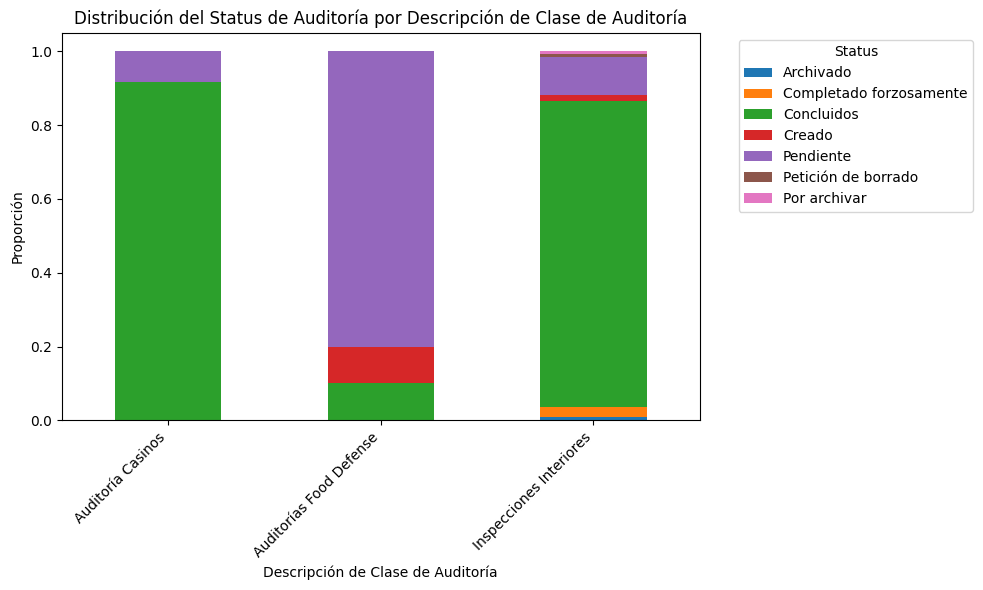

In [ ]:
# Graficar la tabla de contingencia como barras apiladas (barras + proporciones por categoría)
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))  # gráfico de barras apiladas

plt.title('Distribución del Status de Auditoría por Descripción de Clase de Auditoría')  # título del gráfico
plt.xlabel('Descripción de Clase de Auditoría')  # etiqueta del eje X
plt.ylabel('Proporción')  # etiqueta del eje Y

plt.xticks(rotation=45, ha='right')  # rotar etiquetas del eje X para mejor lectura

plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico

plt.tight_layout()  # ajustar espacios para evitar solapamientos
plt.show()  # mostrar gráfico


Lo que puedes observar:

Auditoría Casinos: La mayoría de estas auditorías están 'Concluidas' (aproximadamente un 92%), y un porcentaje menor están 'Pendientes' (alrededor del 8%). Esto significa que las auditorías de casinos se finalizan en gran medida, con pocas quedando por resolver.
Auditorías Food Defense: Aquí, la situación es diferente. Un 80% de estas auditorías están 'Pendientes', un 10% 'Concluidas' y otro 10% 'Creado'. Esto sugiere que muchas auditorías de Food Defense están en curso o esperando alguna acción.
Inspecciones Interiores: Esta categoría es la más variada. Aunque también tiene un alto porcentaje de 'Concluidas' (alrededor del 83%), se observan proporciones significativas en 'Pendiente' (alrededor del 10%) y porcentajes más pequeños en otros estados como 'Completado forzosamente', 'Creado', 'Archivado', 'Petición de borrado' y 'Por archivar'. Esto indica un proceso más complejo y una mayor diversidad de situaciones para estas inspecciones.
En resumen:

La mayoría de las auditorías se concluyen, lo cual es positivo.
Las 'Auditorías Food Defense' podrían tener cuellos de botella, ya que tienen muchas auditorías 'Pendientes'.
Las 'Inspecciones Interiores' muestran un ciclo de vida más diverso y pueden requerir un análisis más detallado de cada estado.
Este análisis te permite identificar rápidamente qué tipos de auditorías funcionan bien y cuáles necesitan más atención.

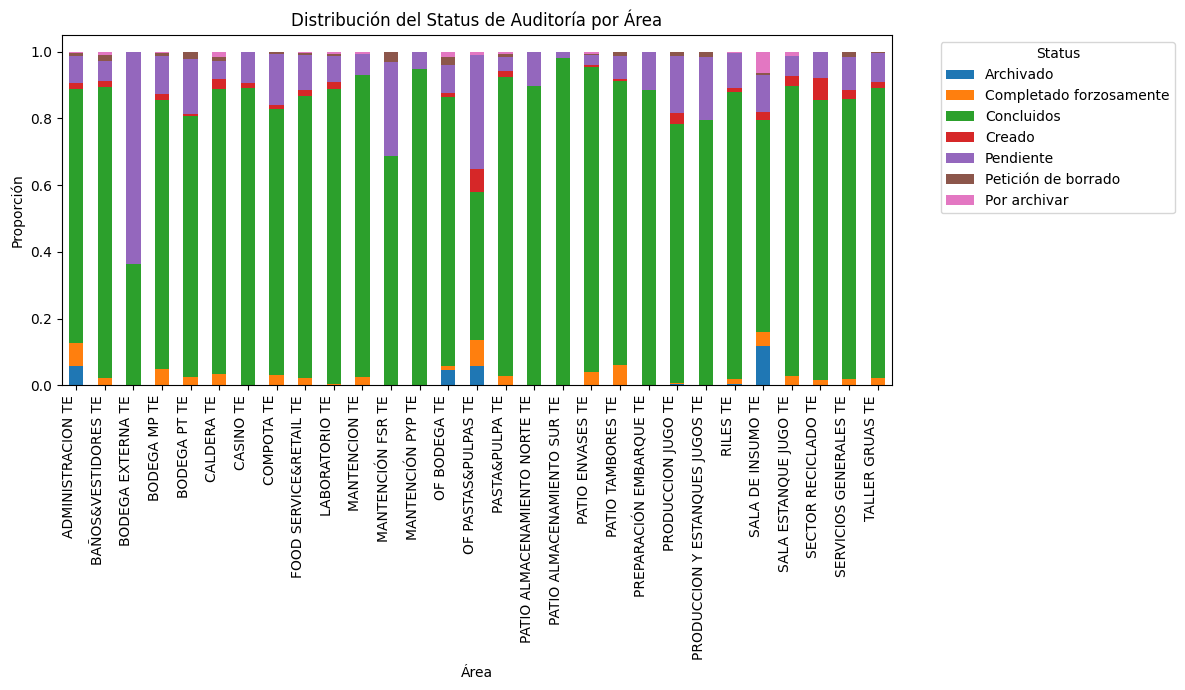

In [ ]:
# Tabla de contingencia normalizada por fila (Áreas) para obtener proporciones
contingency_table_area = pd.crosstab(df['Area'], df['Status'], normalize='index')  # crea proporciones por área

contingency_table_area.plot(kind='bar', stacked=True, figsize=(12, 7))  # gráfico de barras apiladas

plt.title('Distribución del Status de Auditoría por Área')  # título del gráfico
plt.xlabel('Área')  # etiqueta del eje X
plt.ylabel('Proporción')  # etiqueta del eje Y

plt.xticks(rotation=90, ha='right')  # rota etiquetas del eje X para mayor legibilidad

plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico

plt.tight_layout()  # ajusta para evitar solapamientos
plt.show()  # muestra el gráfico


Este gráfico de barras apiladas, 'Distribución del Status de Auditoría por Área', muestra la proporción de cada estado de auditoría (como 'Concluidos', 'Pendiente', 'Creado', etc.) para cada una de las diferentes áreas. Cada barra representa un área, y los segmentos de colores dentro de cada barra indican la proporción de los diferentes estados en los que se encuentran sus auditorías.

Observaciones Clave:

Predominio de 'Concluidos': En la mayoría de las áreas, el estado 'Concluidos' es el más grande, lo que sugiere que gran parte de las auditorías se finalizan exitosamente en casi todos los departamentos.
Áreas con alto porcentaje de 'Pendiente': Algunas áreas pueden mostrar una proporción significativamente mayor de auditorías en estado 'Pendiente'. Esto podría indicar cuellos de botella en el proceso de auditoría de esas áreas, falta de recursos para completarlas, o que tienen auditorías con ciclos de vida más largos.
Variabilidad entre Áreas: Se observa una clara variabilidad en la distribución de estados. Algunas áreas tienen una distribución muy concentrada en 'Concluidos', mientras que otras muestran una mezcla más diversa de estados como 'Creado', 'Archivado', o 'Completado forzosamente'.
'Creado' y 'Por Archivar': La presencia de auditorías en estado 'Creado' indica auditorías recién iniciadas, mientras que 'Por archivar' y 'Archivado' representan auditorías que han completado su ciclo y han sido guardadas. Estas proporciones son generalmente menores en la mayoría de las áreas.
'Petición de borrado' y 'Completado forzosamente': Estos estados son menos comunes y su presencia en un área específica podría señalar situaciones particulares o excepcionales en el manejo de ciertas auditorías.
Ejemplos Específicos (basado en el kernel):

ADMINISTRACION TE: Muestra una distribución más variada con proporciones de 'Archivado', 'Completado forzosamente', 'Concluidos', 'Creado' y 'Pendiente'.
BAÑOS&VESTIDORES TE: Predominantemente 'Concluidos' con una porción de 'Pendiente'.
BODEGA EXTERNA TE: Parece tener una alta tasa de 'Concluidos', con casi ninguna otra categoría presente.
COMPOTA TE: Muestra una mezcla de 'Concluidos', 'Creado' y 'Pendiente', similar a otras áreas de producción.
Implicaciones:

Este gráfico es muy útil para:

Identificar áreas problemáticas: Las áreas con un alto volumen de auditorías 'Pendiente' podrían requerir una revisión de sus procesos o recursos.
Evaluar la eficiencia: Las áreas con una alta proporción de 'Concluidos' demuestran eficiencia en la gestión de auditorías.
Comparar el rendimiento: Permite comparar el estado de las auditorías entre diferentes áreas para identificar mejores prácticas o necesidades específicas.
En resumen, este visual te proporciona una visión de alto nivel sobre cómo cada departamento está manejando y progresando con sus auditorías, permitiendo identificar patrones y posibles puntos de mejora.

#3.- Conteo de No Conformidades 2019-2025

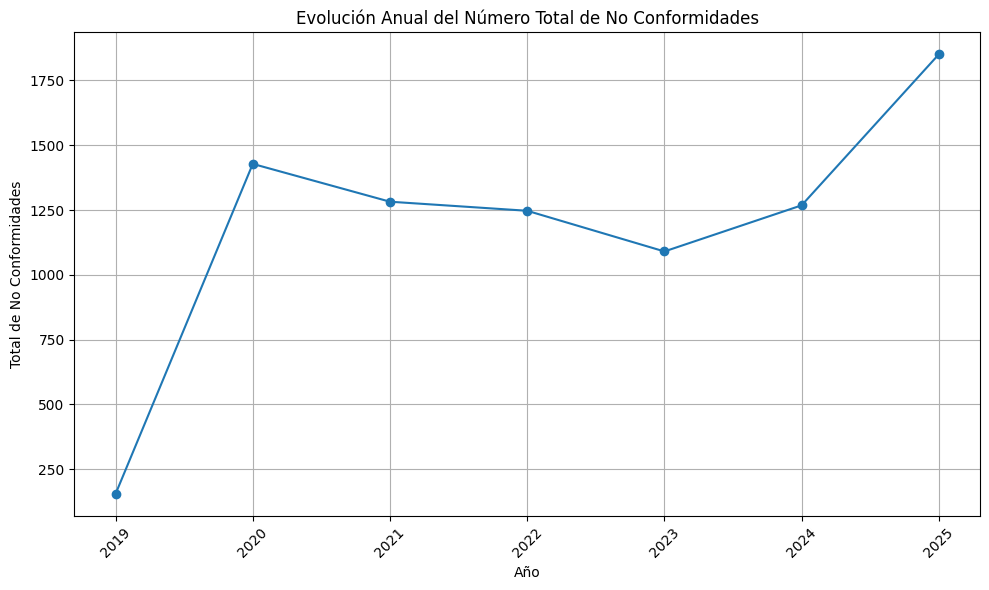

In [ ]:
# Asegurar que la columna 'Creado ' sea de tipo datetime
df['Creado '] = pd.to_datetime(df['Creado '])  # convierte a fecha

# Extraer el año desde la columna 'Creado '
df['Año'] = df['Creado '].dt.year  # obtiene el año de creación

# Agrupar por año y sumar las no conformidades
non_conformities_annual = df.groupby('Año')['No Conformidad'].sum()  # total anual

plt.figure(figsize=(10, 6))  # tamaño del gráfico
non_conformities_annual.plot(kind='line', marker='o', linestyle='-')  # línea con marcadores

plt.title('Evolución Anual del Número Total de No Conformidades')  # título
plt.xlabel('Año')  # eje X
plt.ylabel('Total de No Conformidades')  # eje Y
plt.xticks(rotation=45)  # rotación de etiquetas del eje X
plt.grid(True)  # cuadrícula
plt.tight_layout()  # ajustes para evitar solapamientos
plt.show()  # mostrar gráfico


El gráfico muestra cómo ha cambiado el número total de no conformidades a lo largo de los años, desde 2019 hasta 2025.

Observaciones Clave:

Tendencia General Ascendente: Desde 2019, hay una tendencia general al aumento en el número de no conformidades. Comenzando con 154 en 2019, las cifras aumentan significativamente en 2020 (1428) y se mantienen relativamente estables con ligeras fluctuaciones en los años intermedios (1282 en 2021, 1247 en 2022, 1090 en 2023, 1268 en 2024).
Pico en 2025: El año 2025 muestra el número más alto de no conformidades registradas, alcanzando 1851. Esto podría indicar un aumento real de incidentes, una mejora en la detección y el registro de no conformidades, o una combinación de ambos.
Variabilidad Anual: Aunque la tendencia general es al alza, se observa una cierta variabilidad año tras año. Por ejemplo, hubo una ligera disminución en 2023 antes de volver a aumentar en 2024 y 2025.
Implicaciones:

El aumento sostenido, y especialmente el pico en 2025, sugiere la necesidad de investigar las causas subyacentes de este incremento. ¿Se debe a nuevos procesos, cambios en la normativa, problemas recurrentes, o una mayor eficiencia en la identificación y reporte de no conformidades?
Es fundamental un análisis más profundo de las no conformidades de 2025 para entender la naturaleza de estos incidentes y determinar si son problemas nuevos o una intensificación de problemas existentes.
En resumen, este gráfico resalta una preocupación creciente en el número de no conformidades, especialmente el notable incremento en el último año, lo que exige una investigación detallada para tomar acciones correctivas y preventivas

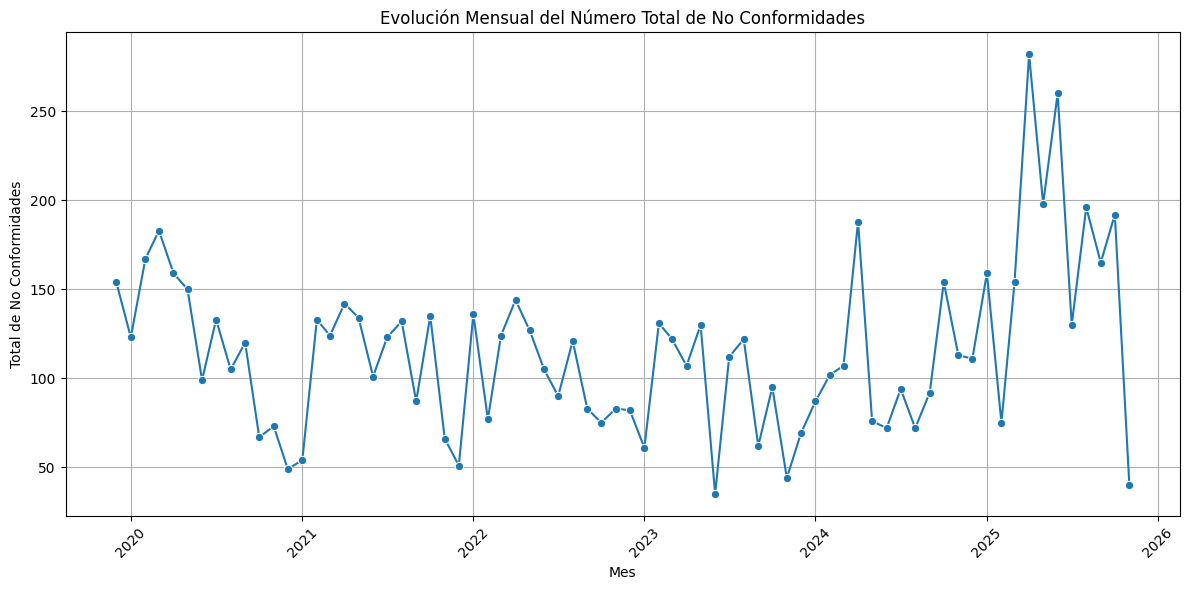

In [ ]:
# Asegurar que la columna 'Creado ' esté en formato datetime
df['Creado '] = pd.to_datetime(df['Creado '])

# Crear columna de Año-Mes
df['AñoMes'] = df['Creado '].dt.to_period('M')

# Agrupar por Año-Mes y sumar las No Conformidades
non_conformities_monthly = df.groupby('AñoMes')['No Conformidad'].sum()

# Convertir el índice a datetime para graficar correctamente
non_conformities_monthly.index = non_conformities_monthly.index.to_timestamp()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=non_conformities_monthly.index, y=non_conformities_monthly.values, marker='o')

plt.title('Evolución Mensual del Número Total de No Conformidades')
plt.xlabel('Mes')
plt.ylabel('Total de No Conformidades')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico de líneas muestra la variación en el número total de no conformidades a lo largo de los meses, desde el inicio de los datos (diciembre de 2019) hasta el último mes registrado (noviembre de 2025).

Observaciones Clave:

Tendencia General y Ciclos: Se observa una fluctuación mensual constante en el número de no conformidades. No hay una tendencia lineal claramente ascendente o descendente a lo largo de todo el período, pero sí se pueden apreciar ciclos o períodos de mayor y menor incidencia.
Picos Recurrentes: Hay varios picos prominentes en el gráfico, lo que indica meses específicos en los que el número de no conformidades fue significativamente más alto que el promedio. Por ejemplo, se aprecian picos notables en ciertos meses de 2020, 2021, y particularmente en 2024 y 2025.
Valles Pronunciados: También se observan valles, es decir, meses con un número muy bajo de no conformidades, como el de noviembre de 2025, o en otros momentos puntuales.
Variabilidad Intra-anual: El gráfico resalta la variabilidad dentro de cada año. Algunos años pueden comenzar con pocas no conformidades, tener picos a mitad de año y luego disminuir, o viceversa. Esto sugiere posibles patrones estacionales.
Implicaciones:

Identificación de Patrones Estacionales: La presencia de picos y valles recurrentes podría indicar que ciertos procesos, eventos operativos o períodos del año son más propensos a generar no conformidades. Investigar estos patrones puede ayudar a anticipar y mitigar problemas.
Evaluación de Intervenciones: Si se han implementado acciones correctivas o preventivas en fechas específicas, este gráfico permite evaluar visualmente su impacto en la reducción de no conformidades en los meses siguientes.
Asignación de Recursos: Comprender la evolución mensual puede guiar la asignación de recursos para auditorías y controles de calidad, enfocándolos en los períodos de mayor riesgo.
Análisis de Causa Raíz Específico: Los meses con picos de no conformidades deben ser objeto de un análisis de causa raíz más profundo para entender qué factores contribuyeron a ese aumento.
En resumen, este gráfico proporciona una visión detallada de la dinámica de las no conformidades a lo largo del tiempo, permitiendo identificar patrones, evaluar el impacto de las acciones y orientar futuras estrategias de mejora continua.

Identificar Meses Pico en 2025: Analizar el DataFrame proyeccion_df (que contiene las no conformidades mensuales para 2025) para identificar los meses con un número significativamente alto de no conformidades.
Filtrar Datos para Meses Pico: Filtrar el DataFrame original df para incluir únicamente las no conformidades que ocurrieron en los meses pico identificados de 2025.
Analizar Factores Contribuyentes: Realizar un análisis de los datos filtrados para identificar las áreas, estados y descripciones de clases de auditoría más comunes asociadas con los picos de no conformidades. Esto incluirá agrupar por estas columnas y examinar las columnas 'Análisis de Causa' y 'Denominación' para obtener información textual.
Visualizar Factores Clave: Crear gráficos de barras para mostrar la distribución de las 'Area' y 'Descrip. clase auditoría' que más contribuyen a los picos de no conformidades en 2025. Asegurar que los gráficos incluyan leyendas claras.
Finalizar Tarea: Presentar un resumen completo de los factores que contribuyen a los picos de no conformidades en 2025, junto con las visualizaciones generadas.

##4.-Evolución Mensual del Número Total de No Conformidades por Área (Gráficos Individuales)

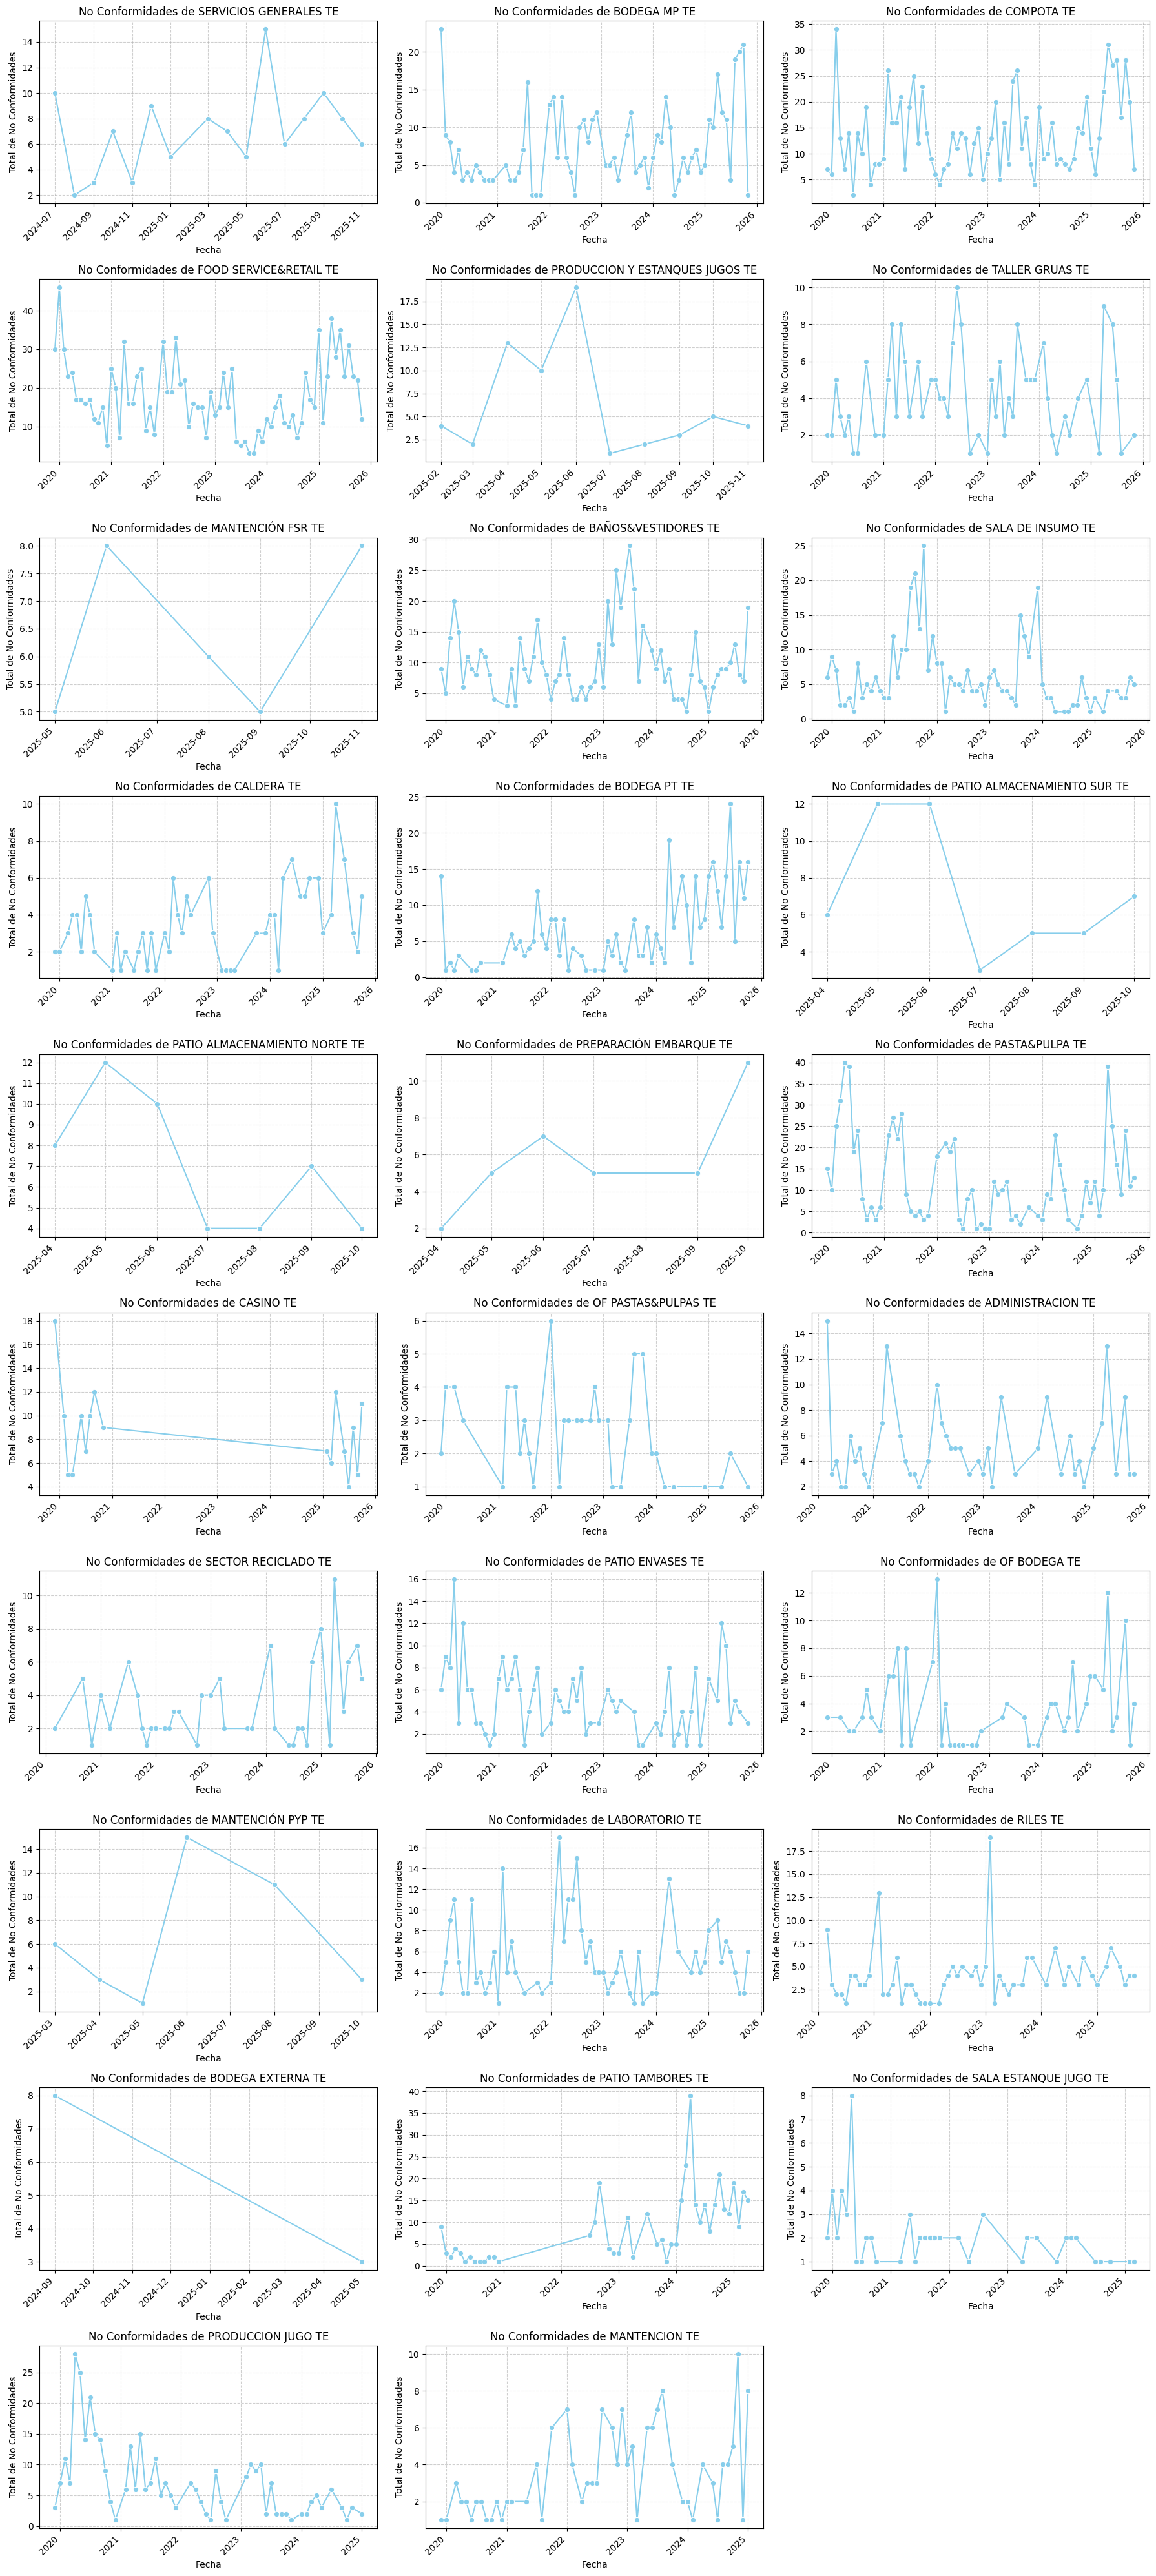

In [ ]:
# Asegurar que la columna 'Creado ' esté en formato datetime
df['Creado '] = pd.to_datetime(df['Creado '])

# Crear columna de Año-Mes
df['AñoMes'] = df['Creado '].dt.to_period('M')

# Obtener una lista de todas las áreas únicas
areas = df['Area'].dropna().unique()

# Determinar el número de filas y columnas para la cuadrícula de gráficos
num_areas = len(areas)
num_cols = 3 # Puedes ajustar este número según tu preferencia
num_rows = (num_areas + num_cols - 1) // num_cols # Calcular el número de filas necesario

plt.figure(figsize=(num_cols * 6, num_rows * 4)) # Ajustar el tamaño total de la figura

for i, area in enumerate(areas):
    plt.subplot(num_rows, num_cols, i + 1) # Crear un subplot para cada área

    # Filtrar el DataFrame para el área actual
    df_area = df[df['Area'] == area].copy()

    # Agrupar por Año-Mes y sumar las No Conformidades para el área actual
    non_conformities_monthly_area = df_area.groupby('AñoMes')['No Conformidad'].sum().reset_index()

    # Convertir el índice 'AñoMes' a datetime para graficar correctamente
    non_conformities_monthly_area['AñoMes'] = non_conformities_monthly_area['AñoMes'].dt.to_timestamp()

    # Crear el gráfico de líneas para el área actual
    sns.lineplot(
        data=non_conformities_monthly_area,
        x='AñoMes',
        y='No Conformidad',
        marker='o',
        color='skyblue' # Color uniforme para todos los gráficos
    )

    plt.title(f'No Conformidades de {area}')
    plt.xlabel('Fecha')
    plt.ylabel('Total de No Conformidades')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Ajustar el diseño para evitar el recorte de elementos
plt.show()

## Resumen de Factores que Contribuyen a los Picos de No Conformidades en 2025

**Análisis de Meses Pico:**

Los meses de **abril y junio de 2025** han sido identificados como los periodos con un número significativamente alto de no conformidades, superando el umbral calculado (media + 1 desviación estándar).

**Principales Áreas Contribuyentes:**

El análisis de la distribución por 'Área' durante estos meses pico revela que las áreas con mayor proporción de no conformidades son:

*   **FOOD SERVICE&RETAIL TE:** Con la mayor contribución, indicando que esta área es un foco principal de incidentes durante los meses de alta actividad.
*   **PASTA&PULPA TE:** Una contribución significativa, lo que sugiere problemas recurrentes o procesos críticos en esta área.
*   **COMPOTA TE:** También presenta una proporción considerable de no conformidades.

Otras áreas como PRODUCCION Y ESTANQUES JUGOS TE, BODEGA PT TE, y BODEGA MP TE también muestran contribuciones notables.

**Tipos de Auditoría Más Afectados:**

En cuanto a la 'Descripción de Clase de Auditoría', se observa un predominio abrumador de:

*   **Inspecciones Interiores:** Constituyen casi el 96.5% de las no conformidades en los meses pico. Esto indica que la gran mayoría de los incidentes durante estos periodos provienen de hallazgos en las inspecciones internas, lo cual puede deberse a la frecuencia de estas inspecciones o a la naturaleza de los problemas detectados en ellas.
*   **Auditoría Casinos:** Contribuye con un porcentaje mucho menor (aproximadamente 3.5%), lo que sugiere que, si bien son un factor, no son la principal causa del aumento en estos meses específicos.

**Implicaciones Clave:**

*   **Enfoque en Áreas Críticas:** Para mitigar futuros picos, se deben priorizar las acciones correctivas y preventivas en **FOOD SERVICE&RETAIL TE**, **PASTA&PULPA TE** y **COMPOTA TE**. Es fundamental investigar las causas raíz específicas dentro de estas áreas.
*   **Revisión de Inspecciones Interiores:** Dada la alta proporción de 'Inspecciones Interiores', es vital analizar qué tipo de hallazgos son los más comunes en estas inspecciones durante abril y junio, y si hay patrones que puedan abordarse de manera sistémica.

Este análisis proporciona una base sólida para dirigir los esfuerzos de mejora de la calidad y la seguridad operativa hacia los puntos de mayor impacto.

##5.-Distribución de No Conformidades por Área y Distrubucion de dencidad

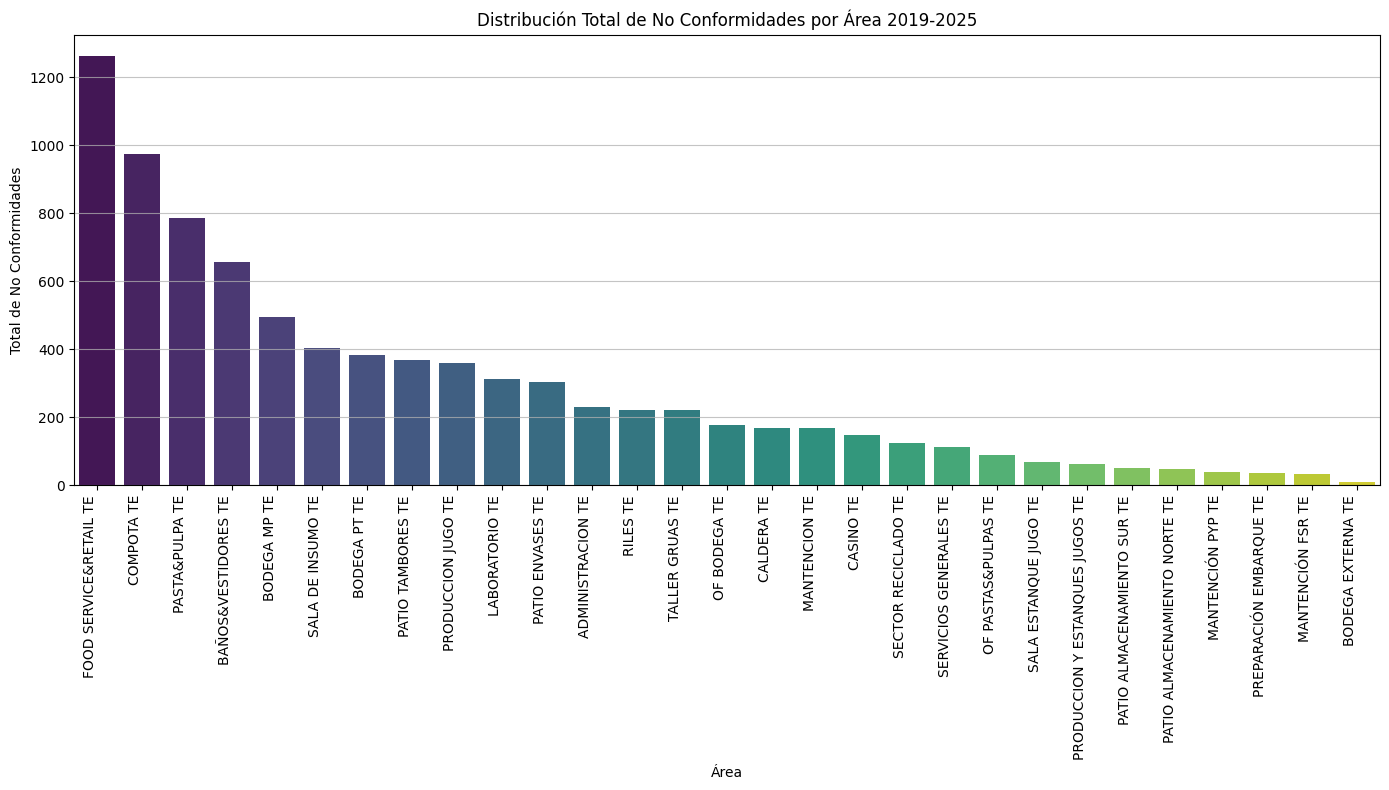

In [ ]:
# Calcular el total de no conformidades por área
non_conformities_per_area = df.groupby('Area')['No Conformidad'].sum().reset_index()

# Ordenar las áreas por el total de no conformidades de forma descendente para mejor visualización
non_conformities_per_area = non_conformities_per_area.sort_values(by='No Conformidad', ascending=False)

# Crear el gráfico de barras, abordando la FutureWarning
plt.figure(figsize=(14, 8))
sns.barplot(x='Area', y='No Conformidad', data=non_conformities_per_area, hue='Area', palette='viridis', legend=False)

plt.title('Distribución Total de No Conformidades por Área 2019-2025')
plt.xlabel('Área')
plt.ylabel('Total de No Conformidades')
plt.xticks(rotation=90, ha='right') # Rotar etiquetas para evitar superposición
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

esumen: Distribución Total de No Conformidades por Área (2019-2025)

Este gráfico muestra la acumulación total de no conformidades por área, destacando:

Áreas de Mayor Incidencia:

FOOD SERVICE&RETAIL TE (1261 no conformidades)
COMPOTA TE (975 no conformidades)
PASTA&PULPA TE (787 no conformidades)
Implicaciones:

Estas tres áreas concentran la mayoría de las no conformidades, sugiriendo puntos críticos para la revisión de procesos y la implementación de mejoras.
Es fundamental realizar un análisis de causa raíz en estas áreas para entender los problemas subyacentes.
Las áreas con menos no conformidades pueden ofrecer mejores prácticas a replicar.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


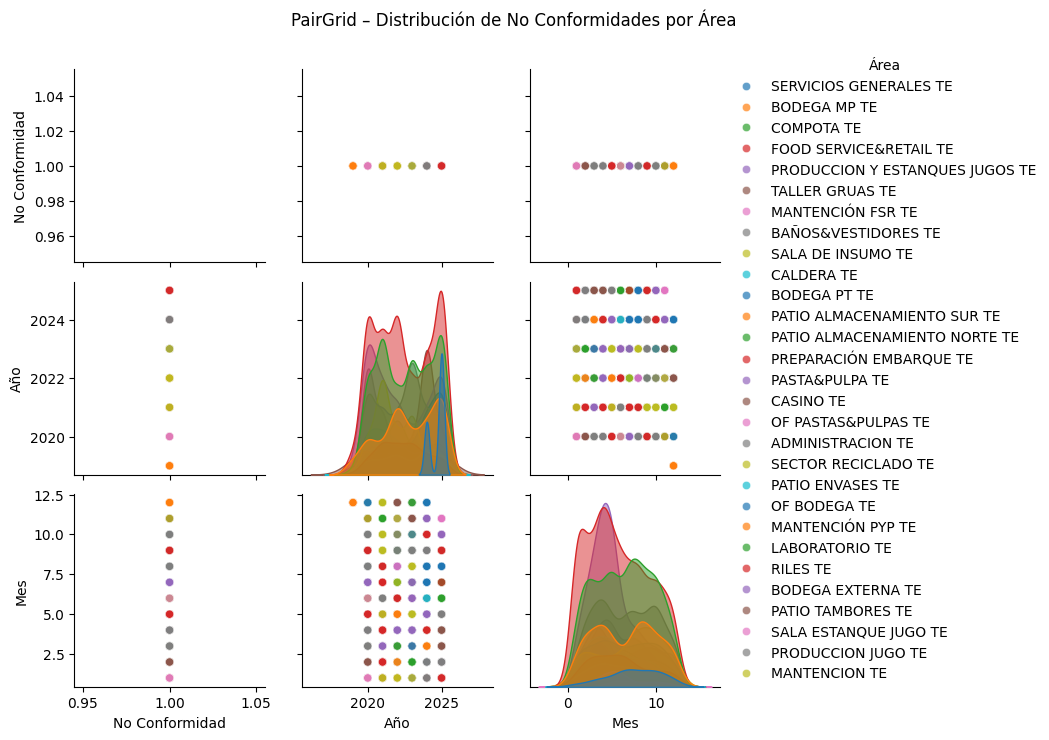

In [ ]:
# --- PREPARACIÓN DE DATOS ---
df.columns = df.columns.str.strip()  # eliminar espacios
if 'Creado' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Creado']):
    df['Creado'] = pd.to_datetime(df['Creado'], errors='coerce')

if 'Año' not in df.columns:
    df['Año'] = df['Creado'].dt.year
if 'Mes' not in df.columns:
    df['Mes'] = df['Creado'].dt.month

# Selección de columnas
selected_columns = ['No Conformidad', 'Año', 'Mes', 'Area']
df_plot = df[selected_columns].dropna().copy()

# --- PAIRGRID ---
g = sns.PairGrid(df_plot, vars=['No Conformidad', 'Año', 'Mes'], hue='Area', palette='tab10', diag_sharey=False)

# Gráficos fuera de la diagonal
g.map_offdiag(sns.scatterplot, alpha=0.7)

# Gráficos en la diagonal
g.map_diag(sns.kdeplot, fill=True, alpha=0.5)

# Ajustes de leyenda y título
g.add_legend(title="Área")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("PairGrid – Distribución de No Conformidades por Área")

plt.show()

Un pairplot (o gráfico de pares) es una forma muy útil de visualizar las relaciones entre todas las combinaciones de variables numéricas en un subconjunto de tu DataFrame. En este caso, para cada área, el pairplot muestra las relaciones entre:

- No Conformidad: El número de no conformidades.
- Año: El año en que se creó la no conformidad.
- Mes: El mes en que se creó la no conformidad

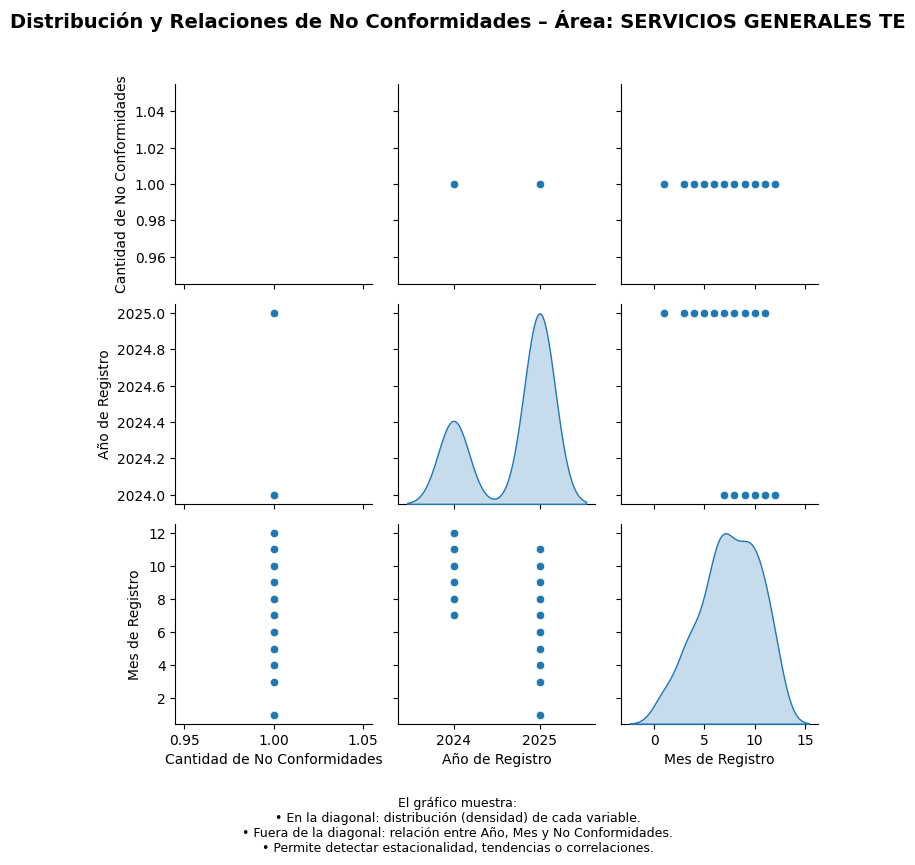

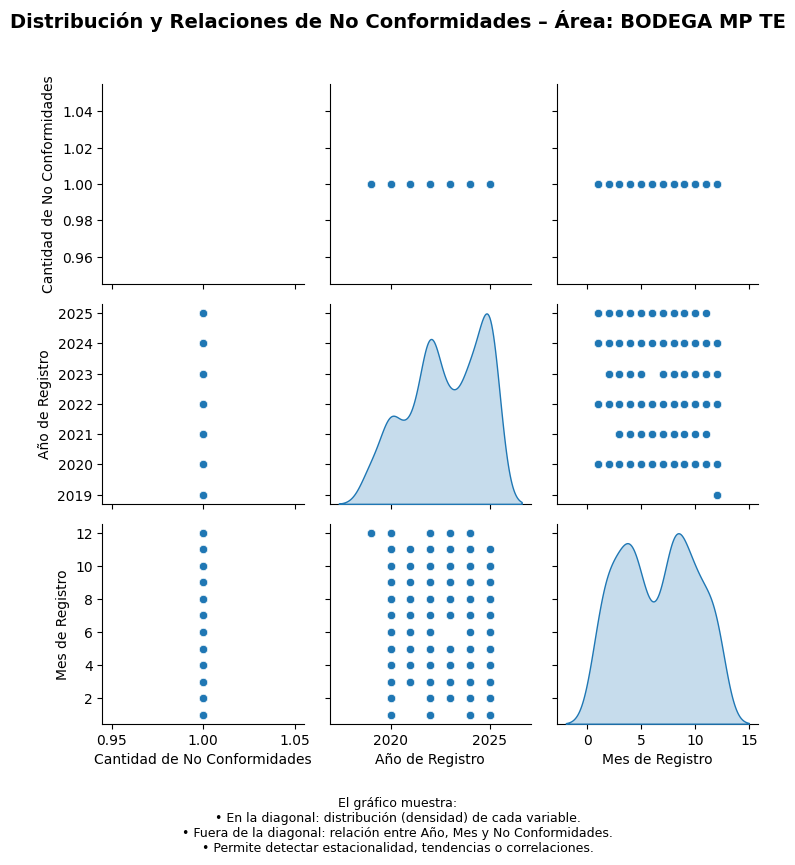

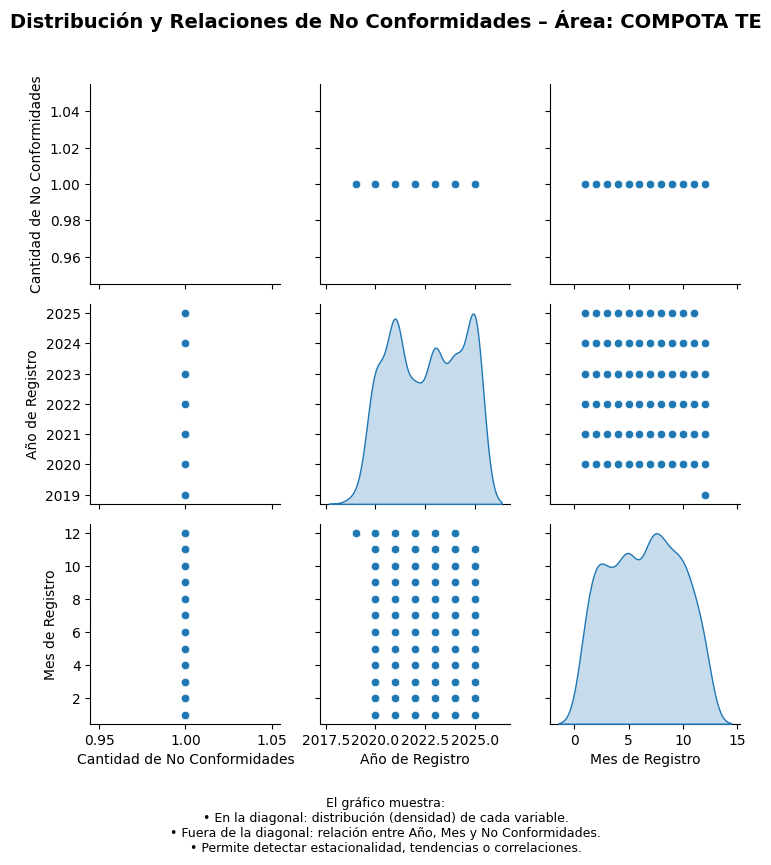

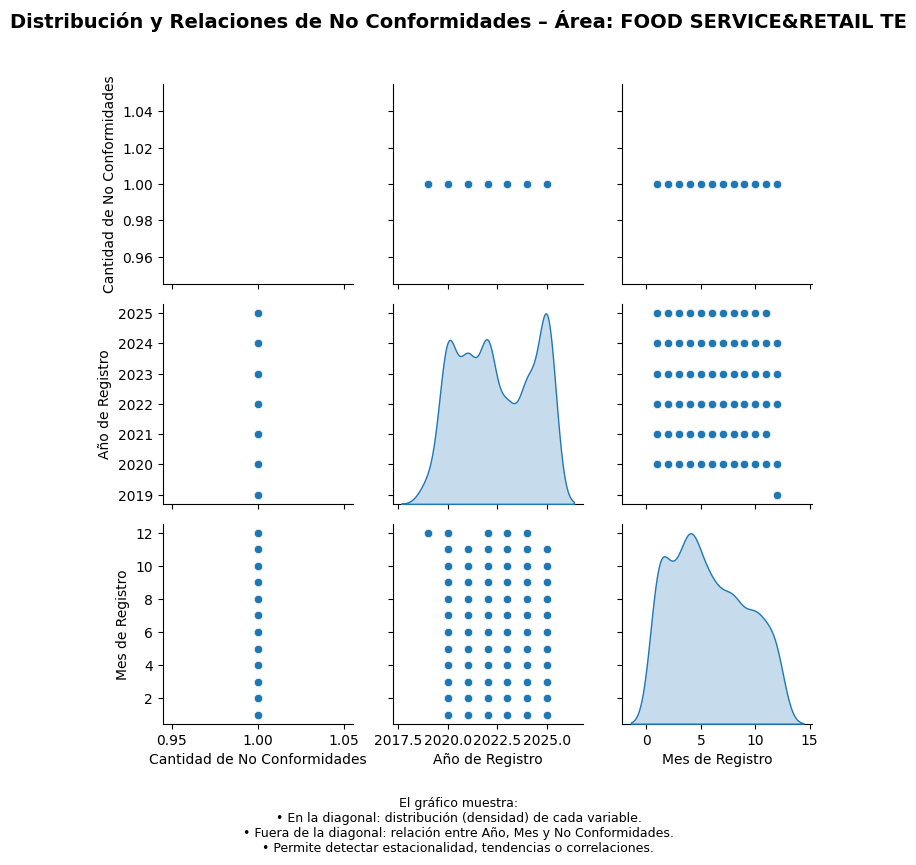

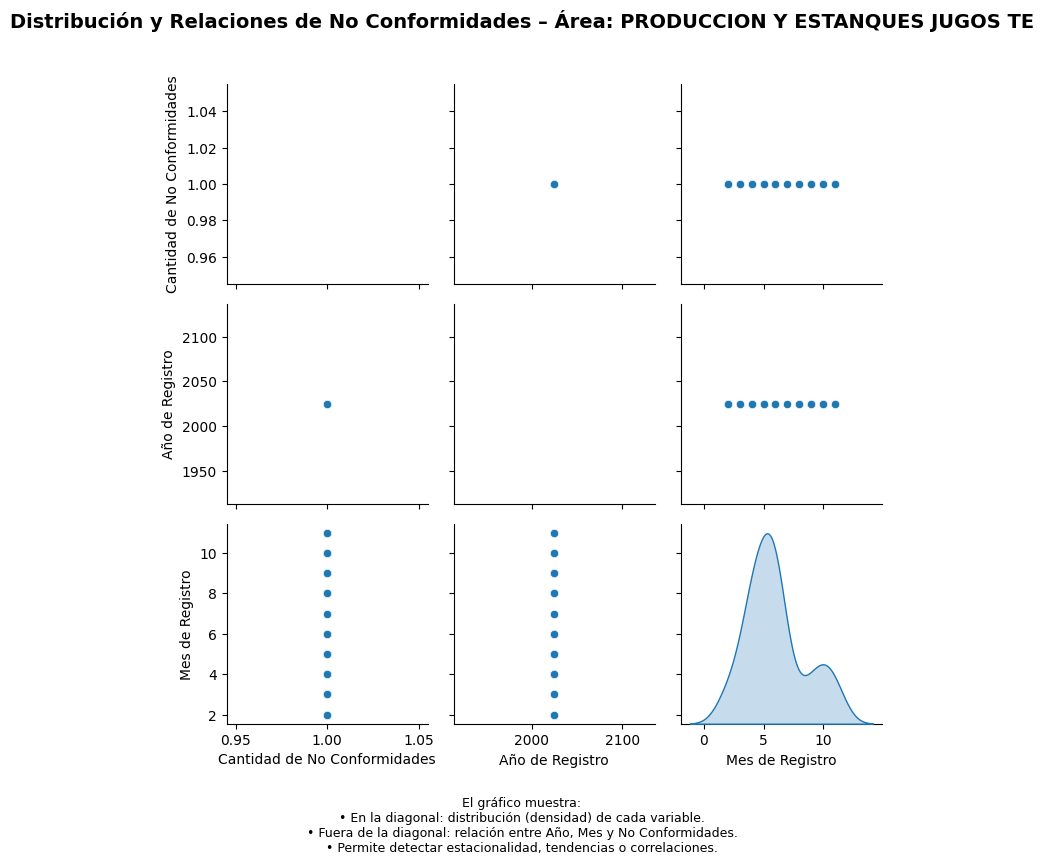

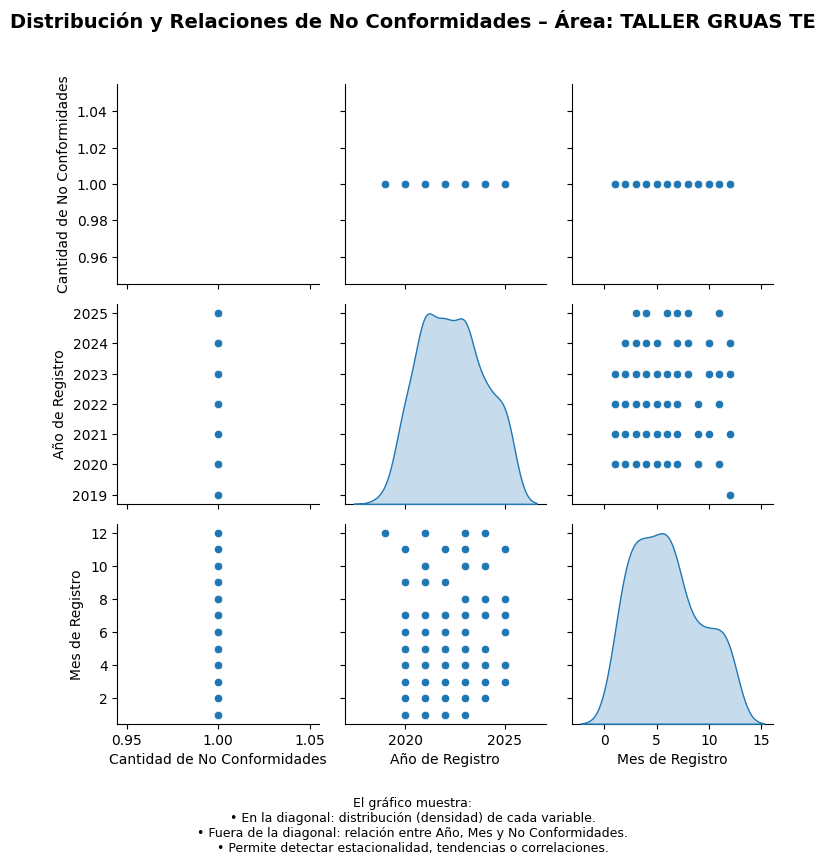

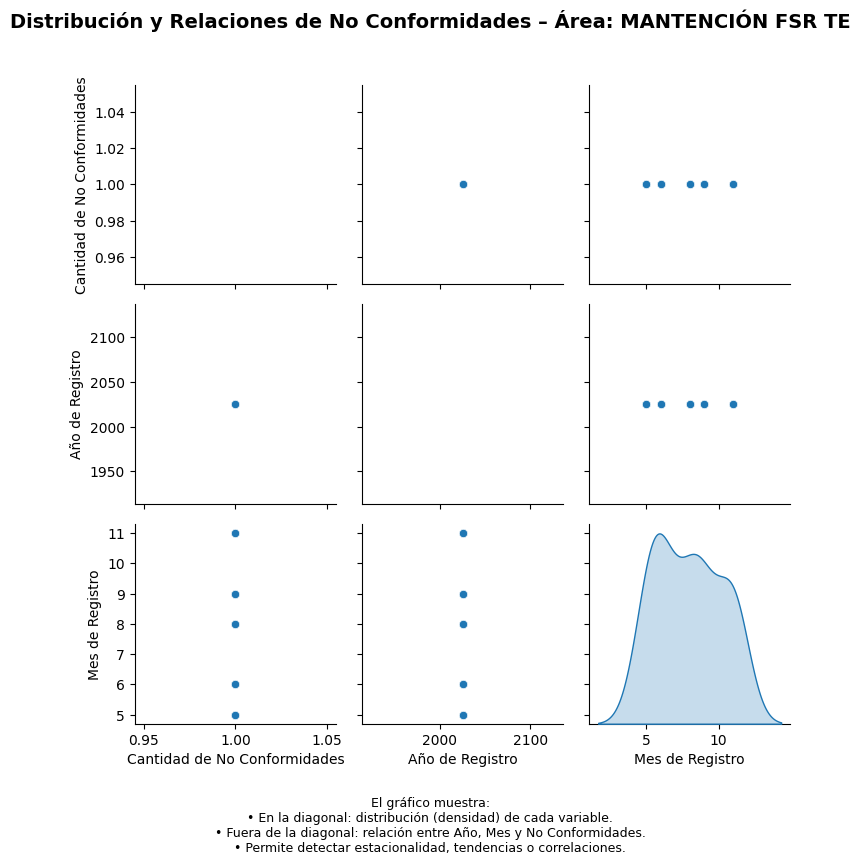

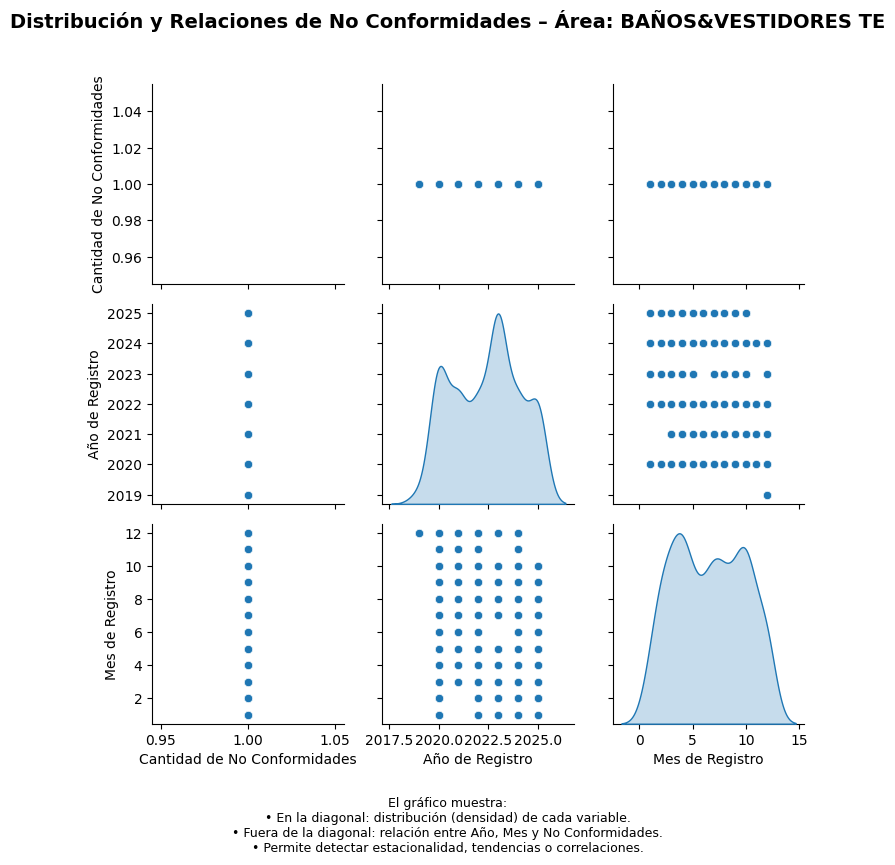

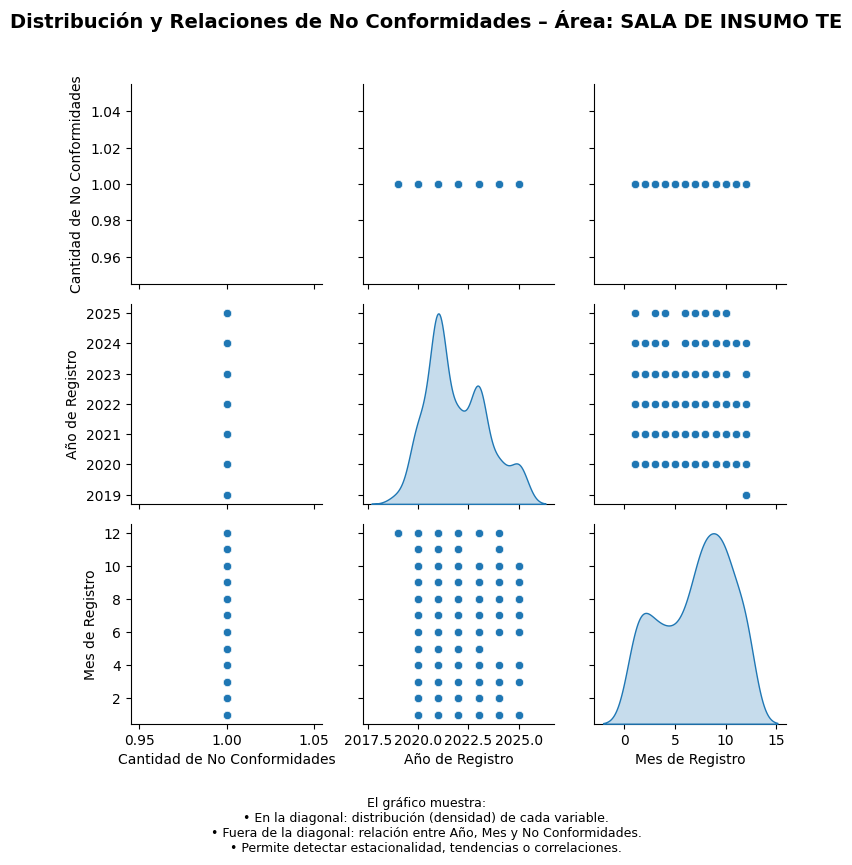

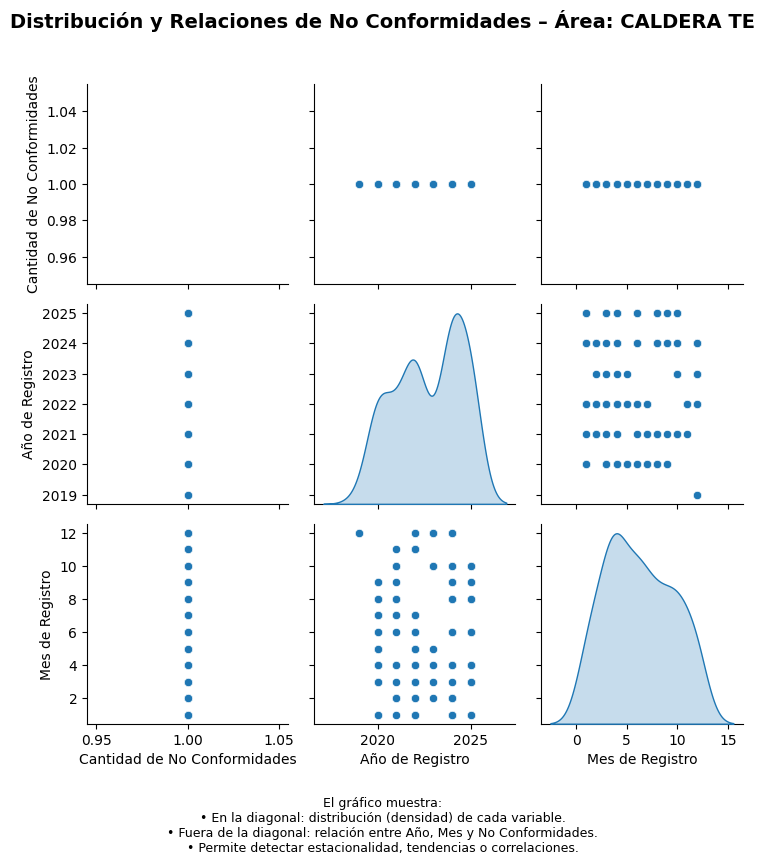

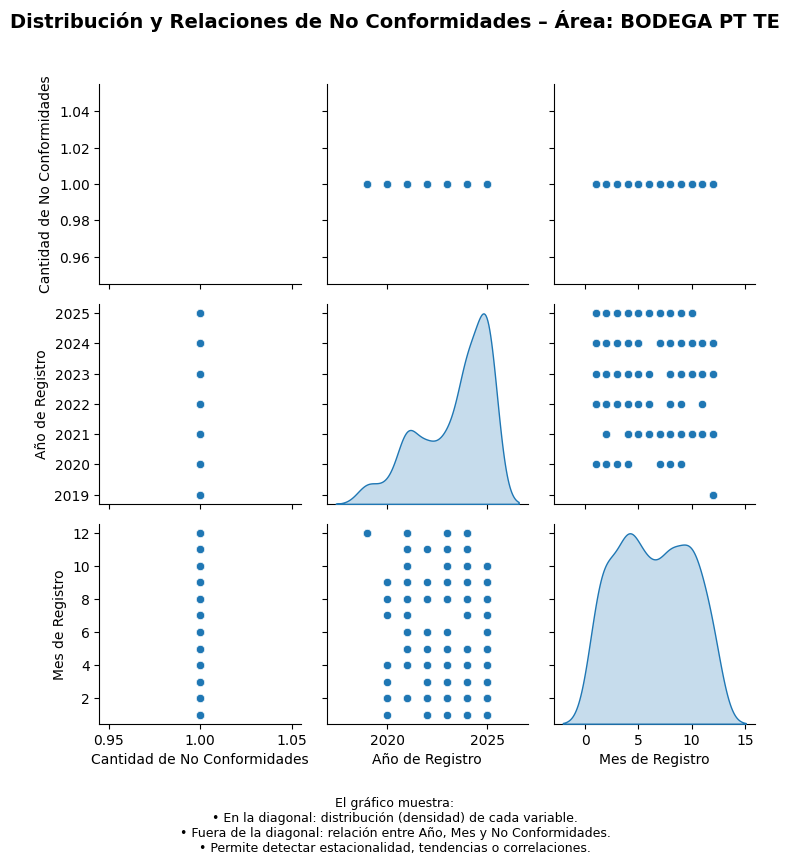

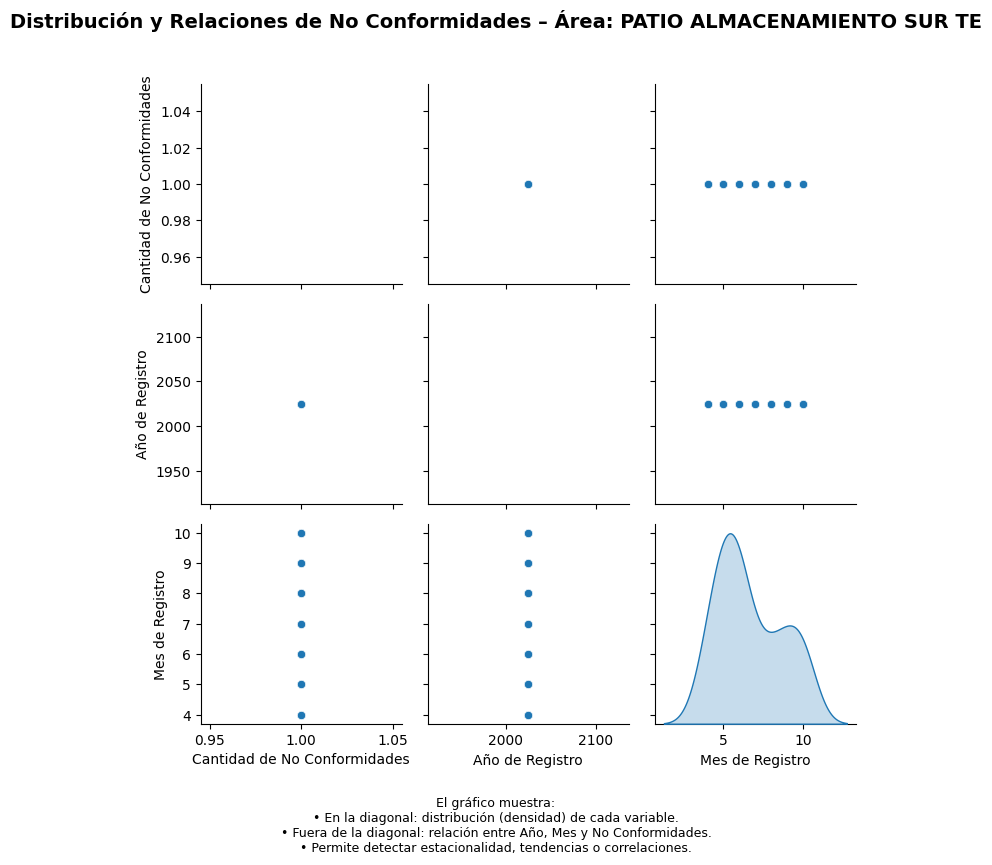

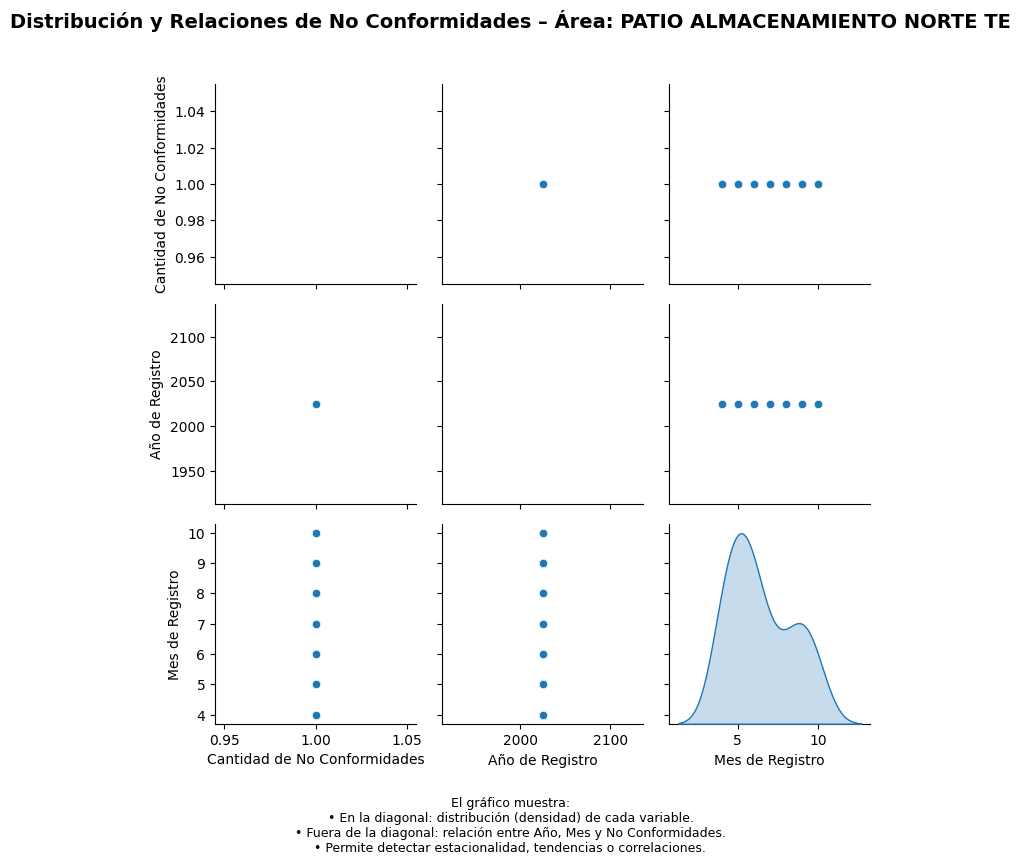

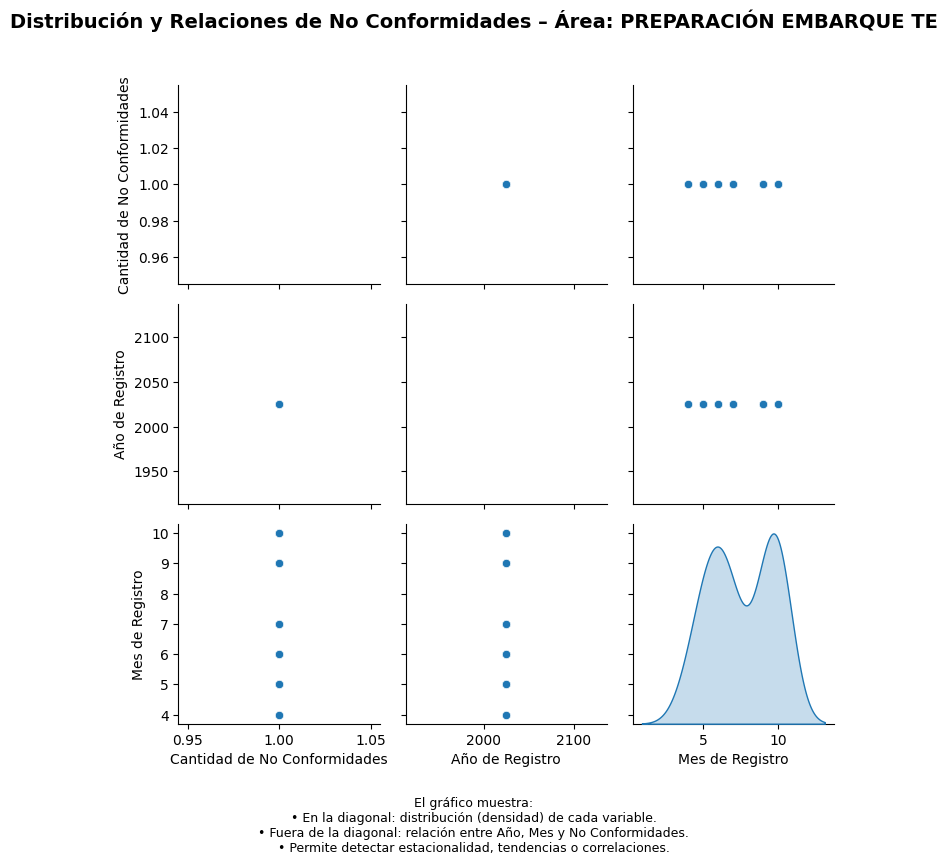

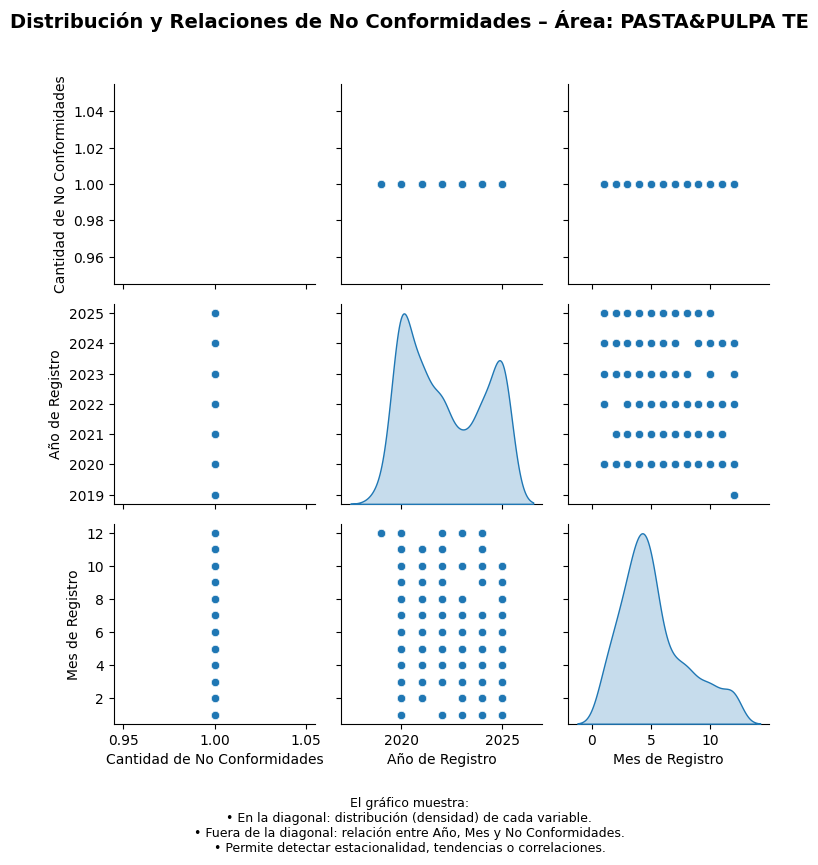

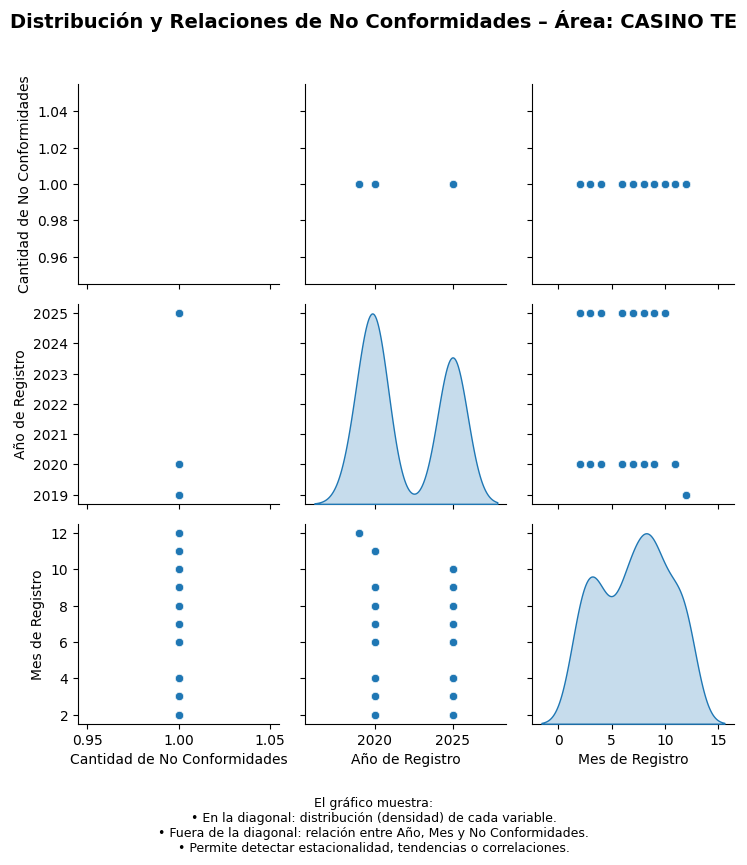

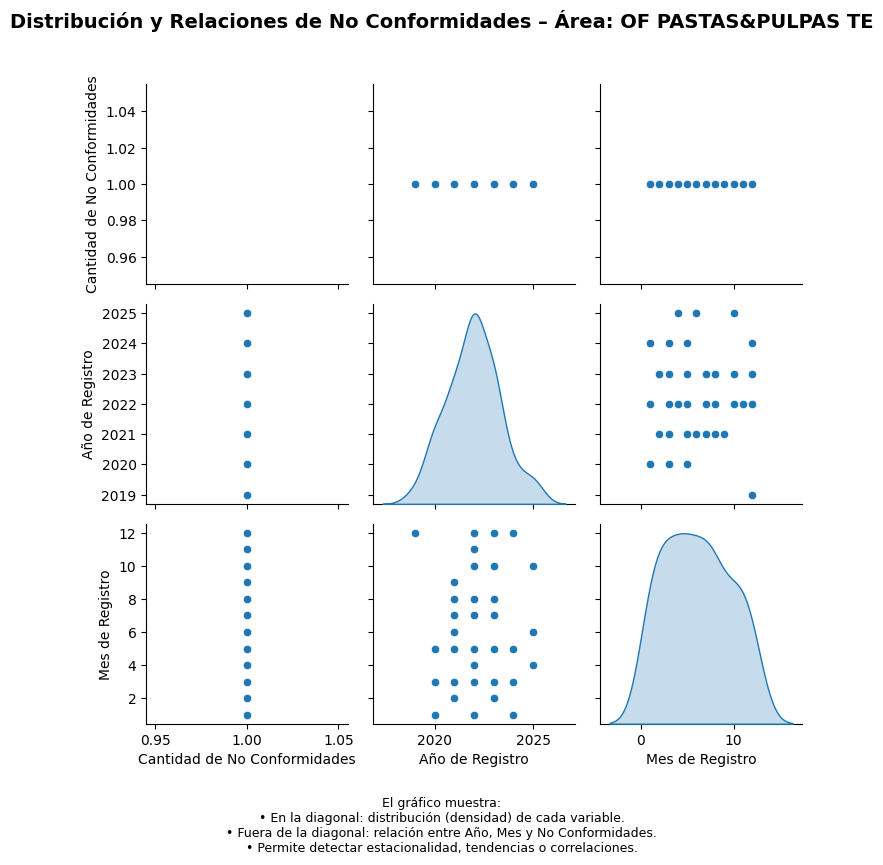

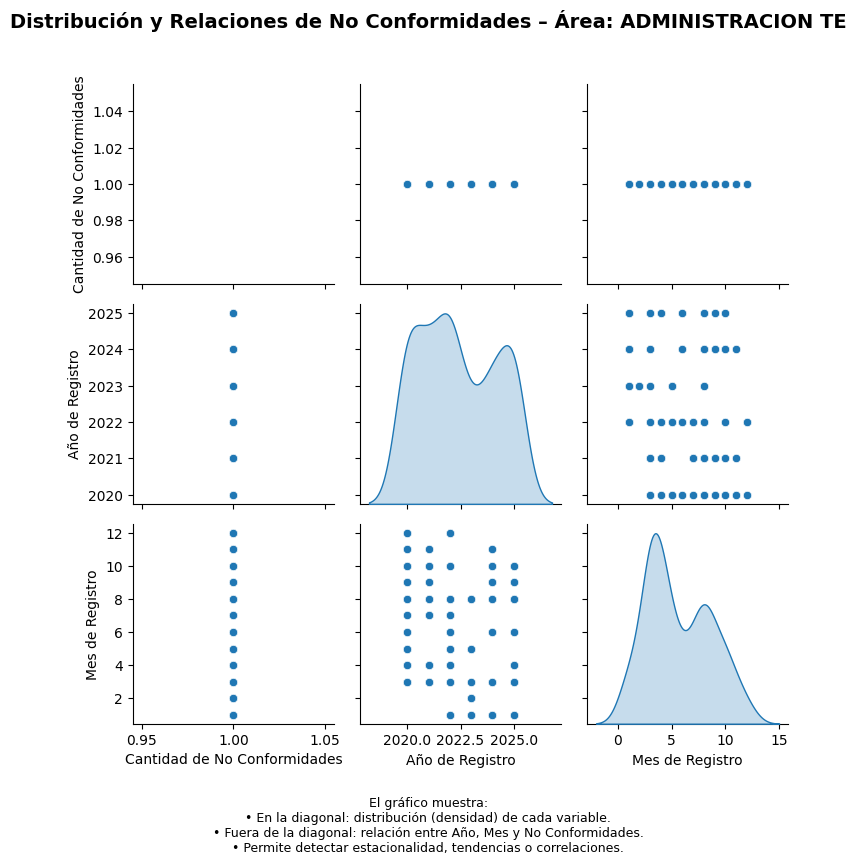

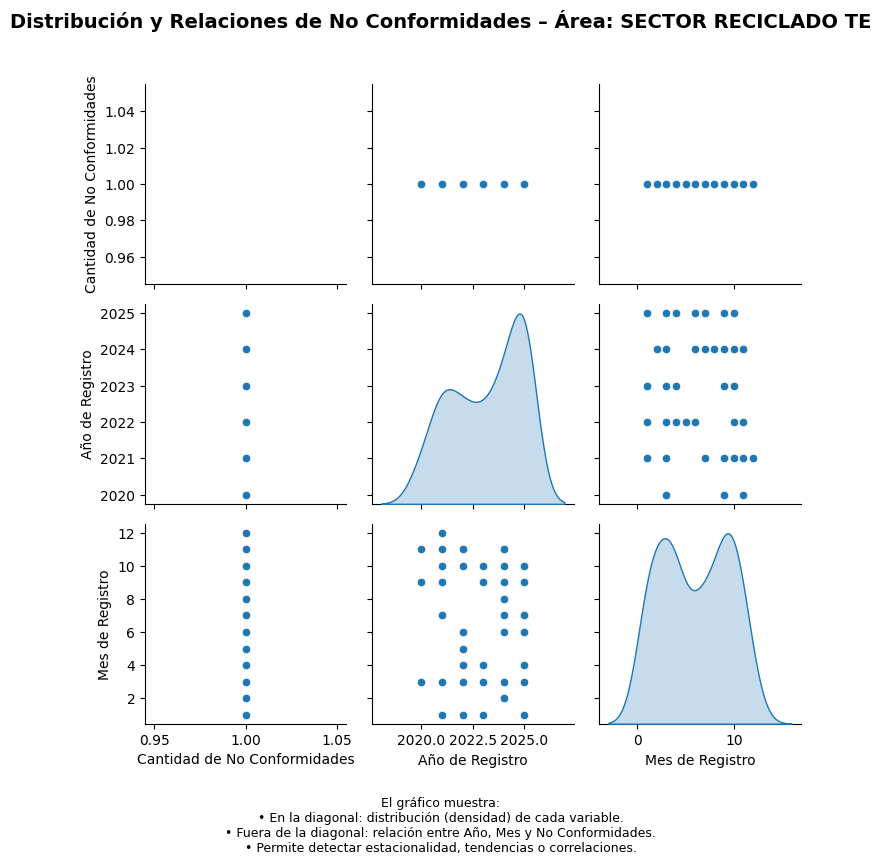

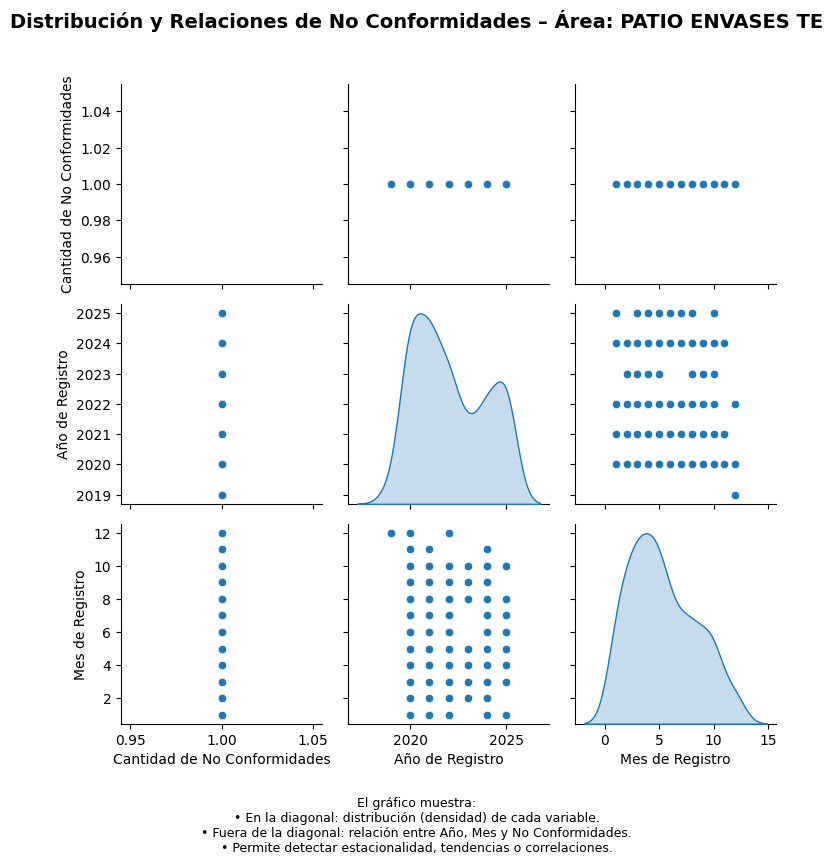

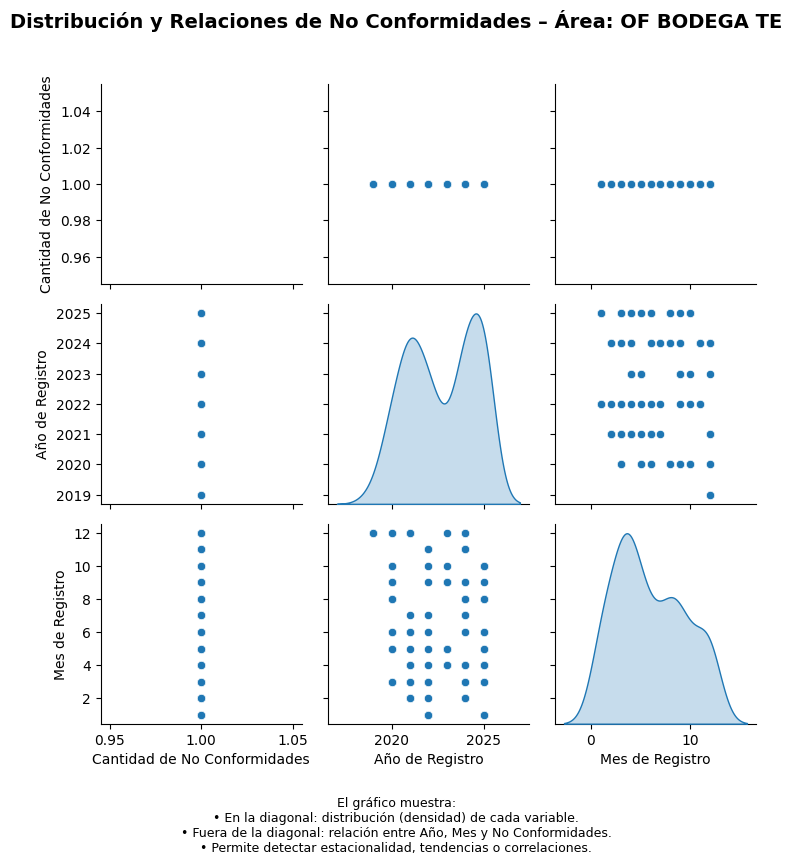

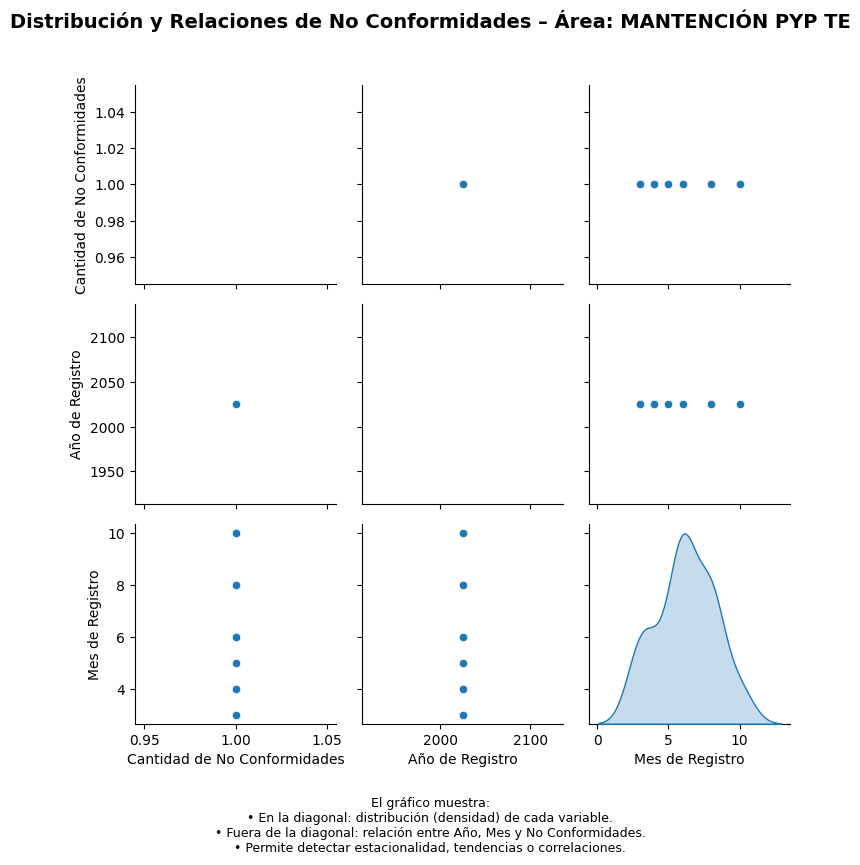

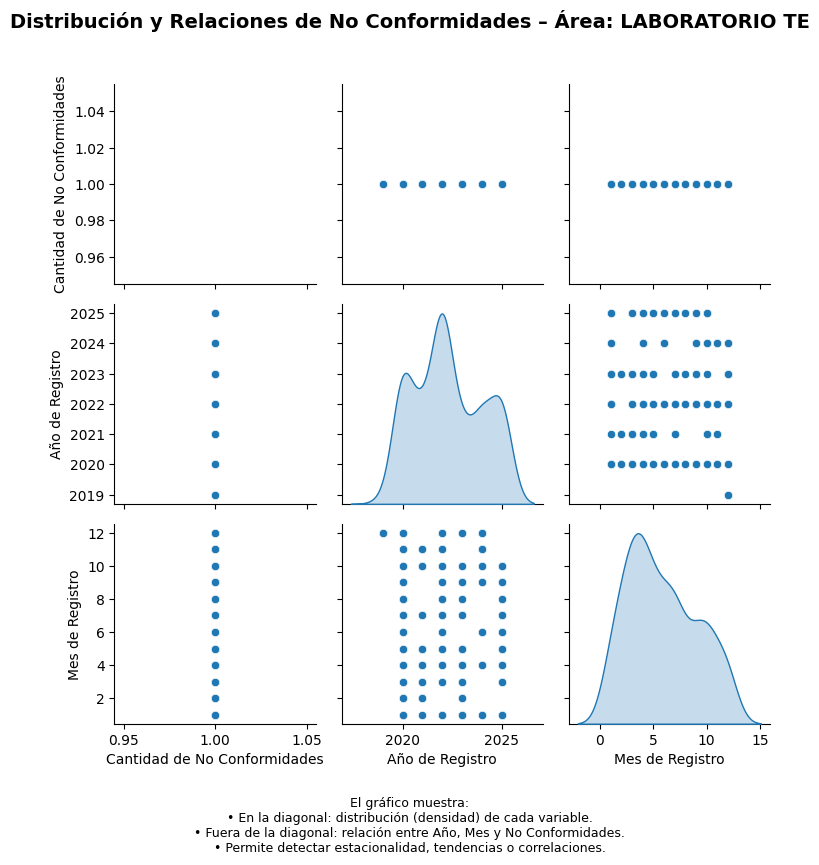

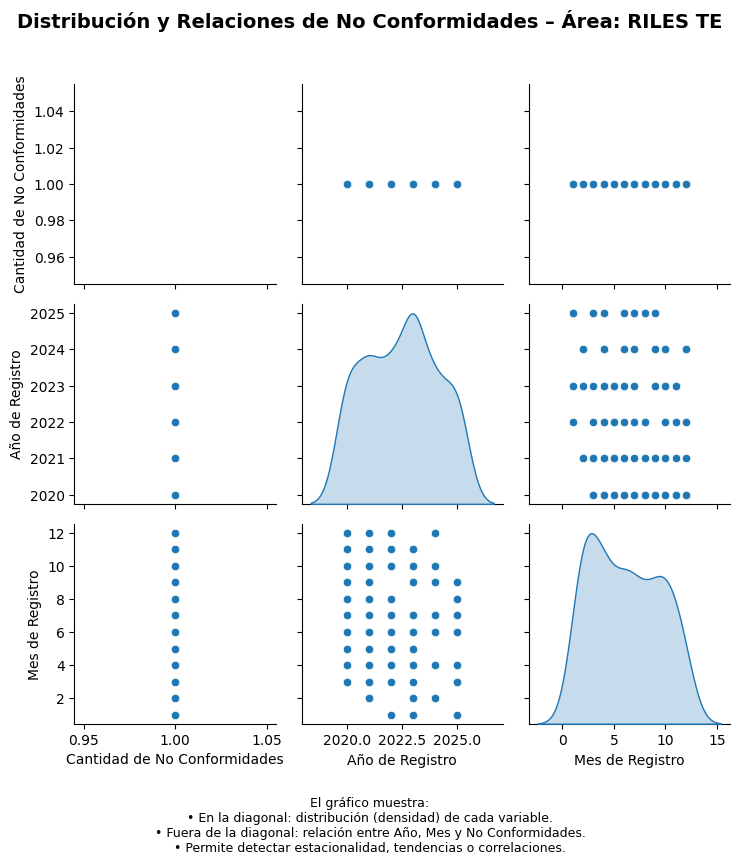

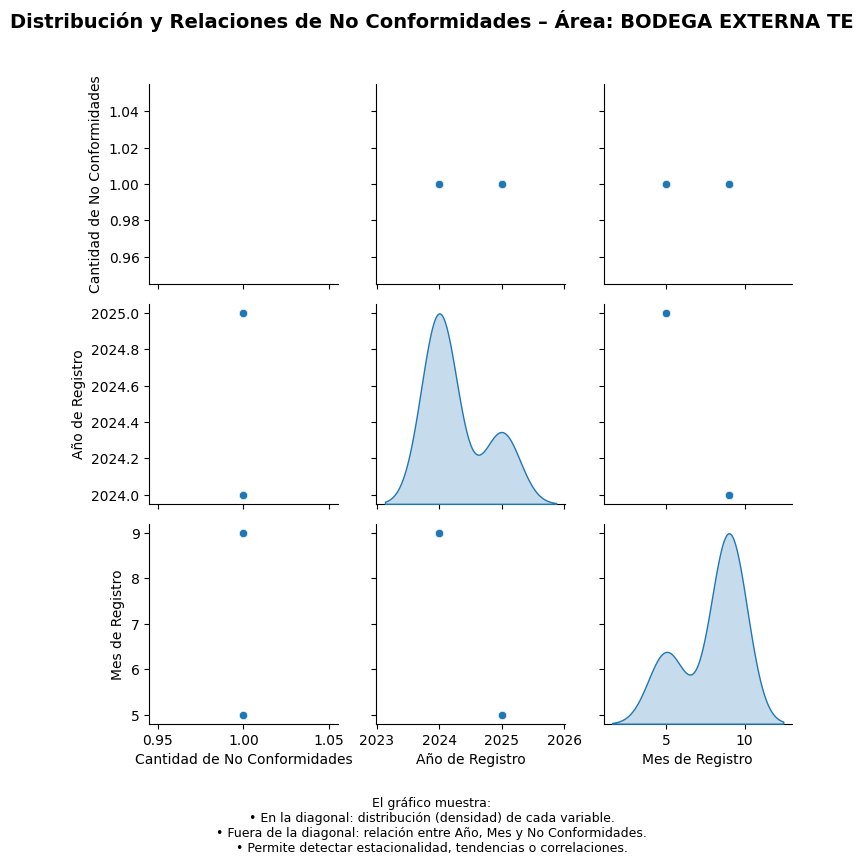

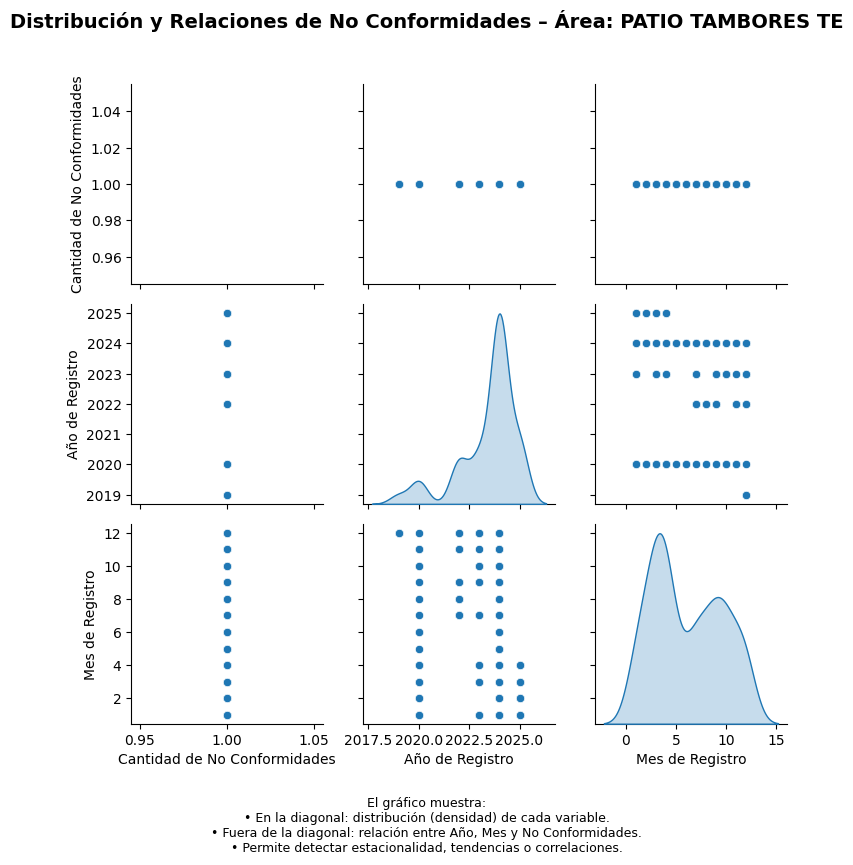

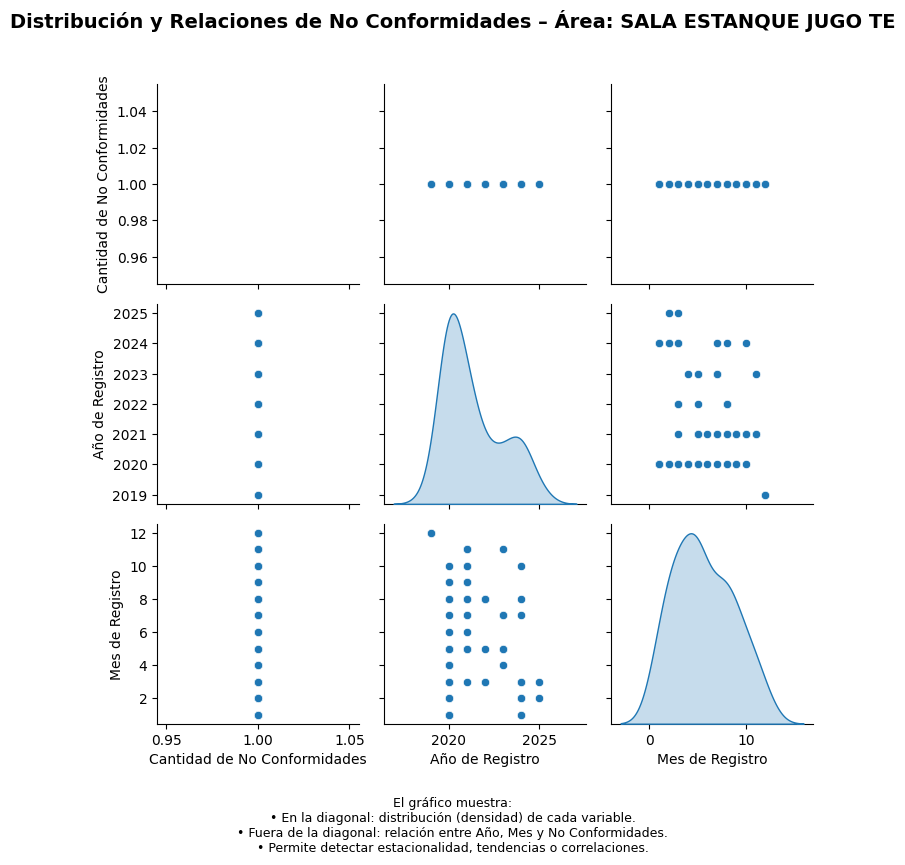

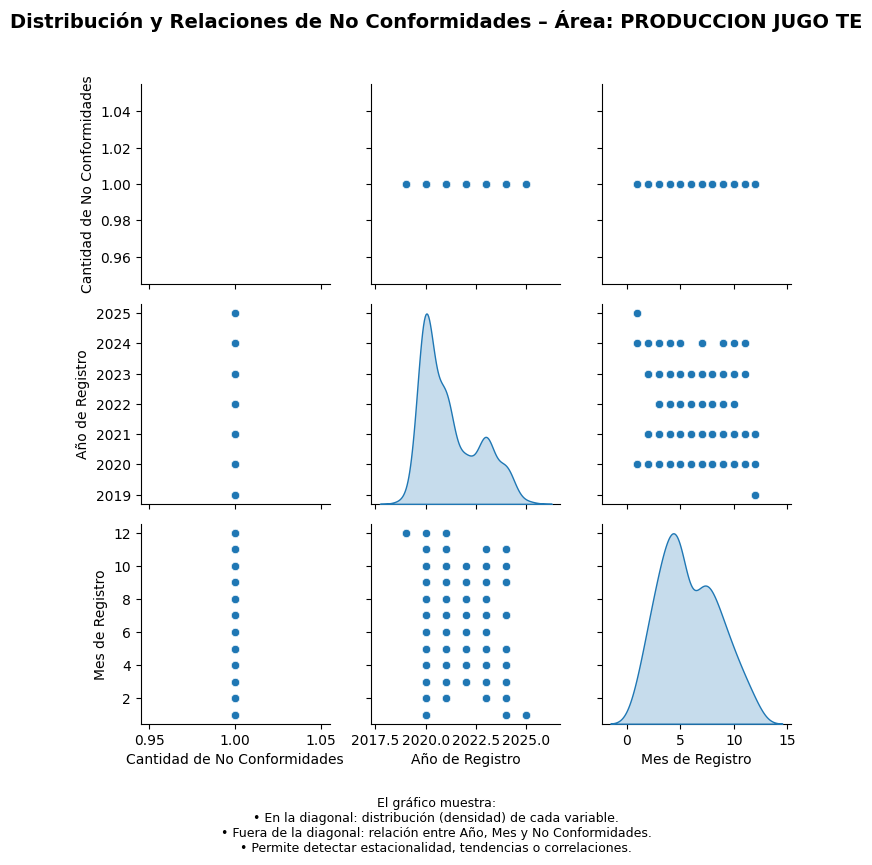

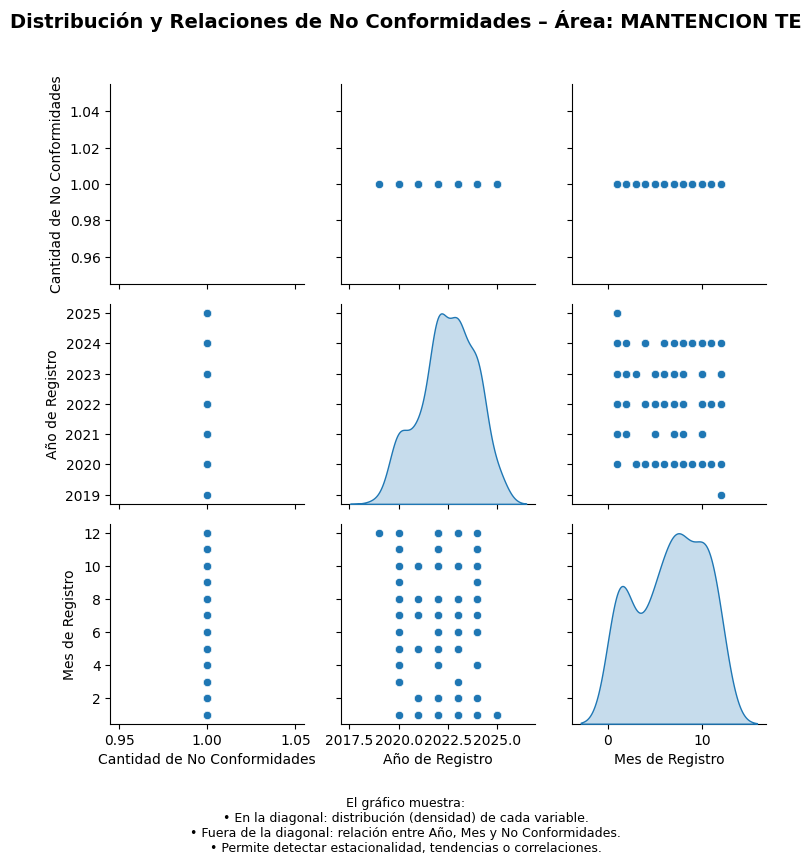

/tmp/ipython-input-3574275901.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sum, x='Area', y='No Conformidad', palette='Blues_r')  # Gráfico de barras


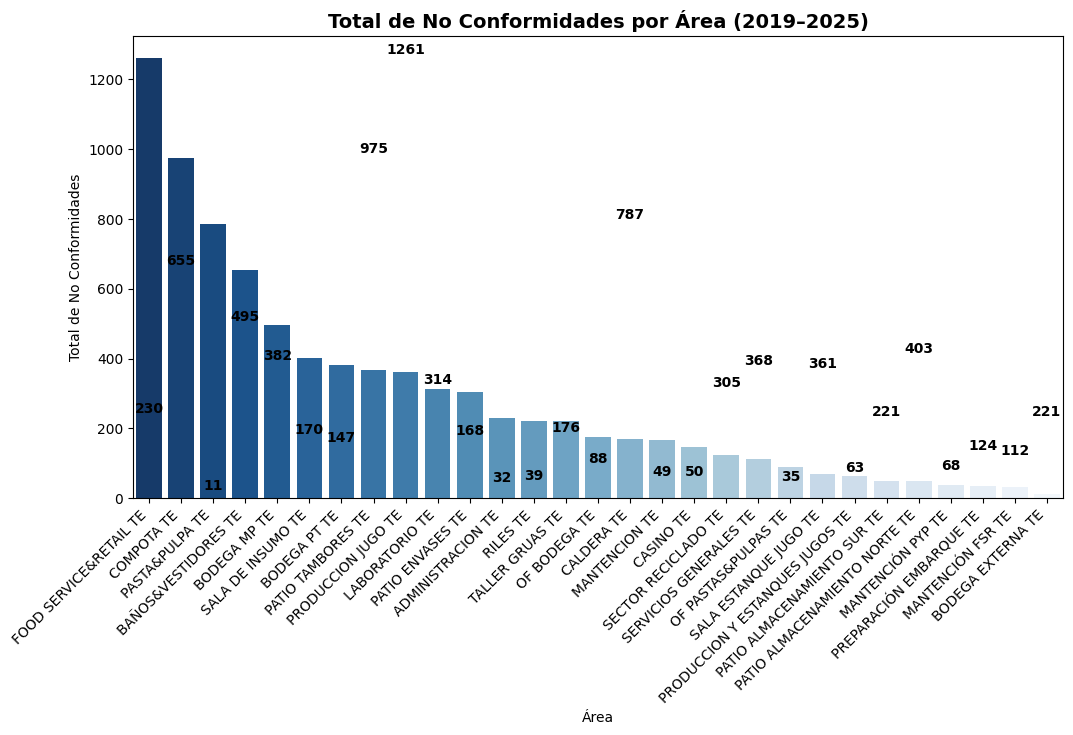

In [ ]:
# --- PREPARACIÓN DE DATOS ---

# Asegurar que 'Creado' sea datetime.
if 'Creado' not in df.columns or not pd.api.types.is_datetime64_any_dtype(df['Creado']):
    df['Creado'] = pd.to_datetime(df['Creado '].astype(str).str.strip(), errors='coerce')  # Convertir a datetime y limpiar espacios
    df.drop(columns=['Creado '], inplace=True)  # Eliminar columna original si existía con espacio

# Crear Año/Mes solo si no existen
if 'Año' not in df.columns:
    df['Año'] = df['Creado'].dt.year  # Extraer año
if 'Mes' not in df.columns:
    df['Mes'] = df['Creado'].dt.month  # Extraer mes

# Selección de columnas necesarias
selected_columns = ['No Conformidad', 'Año', 'Mes', 'Area']
df_plot = df[selected_columns].dropna().copy()  # Crear dataframe limpio para gráficos


# ---------------------------------------------------------
# --- GRÁFICOS INDIVIDUALES POR ÁREA (Pairplot Mejorado) ---
# ---------------------------------------------------------
areas = df_plot['Area'].unique()  # Obtener todas las áreas únicas

axis_labels = {  # Etiquetas más explicativas
    'No Conformidad': 'Cantidad de No Conformidades',
    'Año': 'Año de Registro',
    'Mes': 'Mes de Registro'
}

for area in areas:
    df_area = df_plot[df_plot['Area'] == area]  # Filtrar por área

    g = sns.pairplot(
        df_area,
        vars=['No Conformidad', 'Año', 'Mes'],  # Variables a mostrar
        diag_kind='kde'  # Distribución en la diagonal
    )

    # Título principal
    g.fig.suptitle(
        f"Distribución y Relaciones de No Conformidades – Área: {area}",
        y=1.03,
        fontsize=14,
        fontweight='bold'
    )

    # Cambiar etiquetas de ejes por nombres explicativos
    for ax in g.axes.flatten():
        if ax is not None:
            if ax.get_xlabel() in axis_labels:
                ax.set_xlabel(axis_labels[ax.get_xlabel()], fontsize=10)
            if ax.get_ylabel() in axis_labels:
                ax.set_ylabel(axis_labels[ax.get_ylabel()], fontsize=10)

    # Explicación automática del gráfico debajo
    plt.figtext(
        0.5, -0.02,
        (
            "El gráfico muestra:\n"
            "• En la diagonal: distribución (densidad) de cada variable.\n"
            "• Fuera de la diagonal: relación entre Año, Mes y No Conformidades.\n"
            "• Permite detectar estacionalidad, tendencias o correlaciones."
        ),
        ha='center',
        va='top',
        fontsize=9
    )

    plt.tight_layout()
    plt.show()  # Mostrar gráfico de cada área


# ---------------------------------------------------------
# --- SUMATORIA TOTAL DE NO CONFORMIDADES POR ÁREA ---
# ---------------------------------------------------------

df_sum = df_plot.groupby('Area')['No Conformidad'].count().reset_index()  # Contar No Conformidades por área
df_sum = df_sum.sort_values('No Conformidad', ascending=False)  # Ordenar descendente

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sum, x='Area', y='No Conformidad', palette='Blues_r')  # Gráfico de barras

plt.xticks(rotation=45, ha='right')  # Mejorar legibilidad
plt.title(
    "Total de No Conformidades por Área (2019–2025)",
    fontsize=14, fontweight='bold'
)
plt.xlabel("Área")
plt.ylabel("Total de No Conformidades")

# Mostrar etiquetas encima de las barras
for i, row in df_sum.iterrows():
    plt.text(
        i, row['No Conformidad'] + 5,  # Posición ligeramente arriba de la barra
        str(row['No Conformidad']),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Texto explicativo debajo


Identificar patrones de tiempo: Puedes ver rápidamente si el número de no conformidades en un área específica está aumentando o disminuyendo con los años, o si hay picos recurrentes en ciertos meses.
Entender la magnitud: La distribución de No Conformidad te da una idea de si la mayoría de los incidentes son aislados (valores bajos) o si hay muchos eventos con valores altos de no conformidad.
Comparar áreas: Aunque cada pairplot es individual, puedes comparar visualmente los patrones entre diferentes áreas para ver cuáles tienen comportamientos similares o distintos en relación con las no conformidades a lo largo del tiempo.
En resumen, el pairplot te ofrece una visión integral de cómo las no conformidades en cada área se distribuyen y se relacionan con el tiempo, lo que es crucial para identificar tendencias y tomar decisiones informadas.

# 6.- Analisis de correlacion

In [ ]:
from IPython.display import display

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Asegurar que la columna 'Creado' esté en formato datetime
df['Creado'] = pd.to_datetime(df['Creado'])

# Crear la columna 'AñoMes'
df['AñoMes'] = df['Creado'].dt.to_period('M')

# Eliminar filas donde 'Area' es nulo
df_limpio = df.dropna(subset=['Area'])

# Agrupar por 'Area' y 'AñoMes', luego sumar 'No Conformidad'
no_conformidades_mensuales_por_area = df_limpio.groupby(['Area', 'AñoMes'])['No Conformidad'].sum().reset_index()

# Crear tabla dinámica con 'Area' como columnas y 'AñoMes' como índice
serie_tiempo_por_area = no_conformidades_mensuales_por_area.pivot_table(
    index='AñoMes',
    columns='Area',
    values='No Conformidad'
).fillna(0)

# Convertir el índice 'AñoMes' a timestamp
serie_tiempo_por_area.index = serie_tiempo_por_area.index.to_timestamp()

# Resetear índice para mostrar 'AñoMes' como columna
tabla_limpia = serie_tiempo_por_area.reset_index()

# Mostrar las primeras 5 filas en tabla ordenada
print("Serie temporal mensual de No Conformidades por Área (primeras 5 filas):")
display(tabla_limpia.head())

Serie temporal mensual de No Conformidades por Área (primeras 5 filas):


Area     AñoMes  ADMINISTRACION TE  BAÑOS&VESTIDORES TE  BODEGA EXTERNA TE  \
0    2019-12-01                0.0                  9.0                0.0   
1    2020-01-01                0.0                  5.0                0.0   
2    2020-02-01                0.0                 14.0                0.0   
3    2020-03-01               15.0                 20.0                0.0   
4    2020-04-01                3.0                 15.0                0.0   

Area  BODEGA MP TE  BODEGA PT TE  CALDERA TE  CASINO TE  COMPOTA TE  \
0             23.0          14.0         2.0       18.0         7.0   
1              9.0           1.0         2.0        0.0         6.0   
2              8.0           2.0         0.0       10.0        34.0   
3              4.0           1.0         3.0        5.0        13.0   
4              7.0           3.0         4.0        5.0         7.0   

Area  FOOD SERVICE&RETAIL TE  ...  PATIO TAMBORES TE  PREPARACIÓN EMBARQUE TE  \
0                       30.0  ...                9.0                      0.0   
1                       46.0  ...                3.0                      0.0   
2                       30.0  ...                2.0                      0.0   
3                       23.0  ...                4.0                      0.0   
4                       24.0  ...                3.0                      0.0   

Area  PRODUCCION JUGO TE  PRODUCCION Y ESTANQUES JUGOS TE  RILES TE  \
0                    3.0                              0.0       0.0   
1                    7.0                              0.0       0.0   
2                   11.0                              0.0       0.0   
3                    7.0                              0.0       9.0   
4                   28.0                              0.0       3.0   

Area  SALA DE INSUMO TE  SALA ESTANQUE JUGO TE  SECTOR RECICLADO TE  \
0                   6.0                    2.0                  0.0   
1                   9.0                    4.0                  0.0   
2                   7.0                    2.0                  0.0   
3                   2.0                    4.0                  2.0   
4                   2.0                    3.0                  0.0   

Area  SERVICIOS GENERALES TE  TALLER GRUAS TE  
0                        0.0              2.0  
1                        0.0              2.0  
2                        0.0              5.0  
3                        0.0              3.0  
4                        0.0              2.0  

[5 rows x 30 columns]

In [ ]:
pearson_corr = serie_tiempo_por_area.corr(method='pearson')

print("Pearson Correlation Matrix (first 5x5):")
print(pearson_corr.head().iloc[:, :5])

Pearson Correlation Matrix (first 5x5):
Area                 ADMINISTRACION TE  BAÑOS&VESTIDORES TE  \
Area                                                          
ADMINISTRACION TE             1.000000             0.122229   
BAÑOS&VESTIDORES TE           0.122229             1.000000   
BODEGA EXTERNA TE            -0.044839            -0.021494   
BODEGA MP TE                  0.085993             0.155249   
BODEGA PT TE                 -0.032790             0.064468   

Area                 BODEGA EXTERNA TE  BODEGA MP TE  BODEGA PT TE  
Area                                                                
ADMINISTRACION TE            -0.044839      0.085993     -0.032790  
BAÑOS&VESTIDORES TE          -0.021494      0.155249      0.064468  
BODEGA EXTERNA TE             1.000000     -0.019903     -0.000931  
BODEGA MP TE                 -0.019903      1.000000      0.519465  
BODEGA PT TE                 -0.000931      0.519465      1.000000  



**Correlación de Pearson**

* **Definición:** Mide la fuerza y la dirección de una relación lineal entre dos variables (por ejemplo, el número de no conformidades mensuales entre dos áreas).
* **Rango de valores:** Siempre entre -1 y +1.

  * **r = +1:** Correlación lineal positiva perfecta; ambas variables aumentan de manera idéntica.
  * **r = -1:** Correlación lineal negativa perfecta; una variable aumenta mientras la otra disminuye de manera idéntica.
  * **r = 0:** No existe relación lineal entre las variables.
  * **Valores intermedios (ej. 0.7, -0.4):** Indican la fuerza de la relación; cuanto más cercano a 1 o -1, más fuerte es la relación lineal.



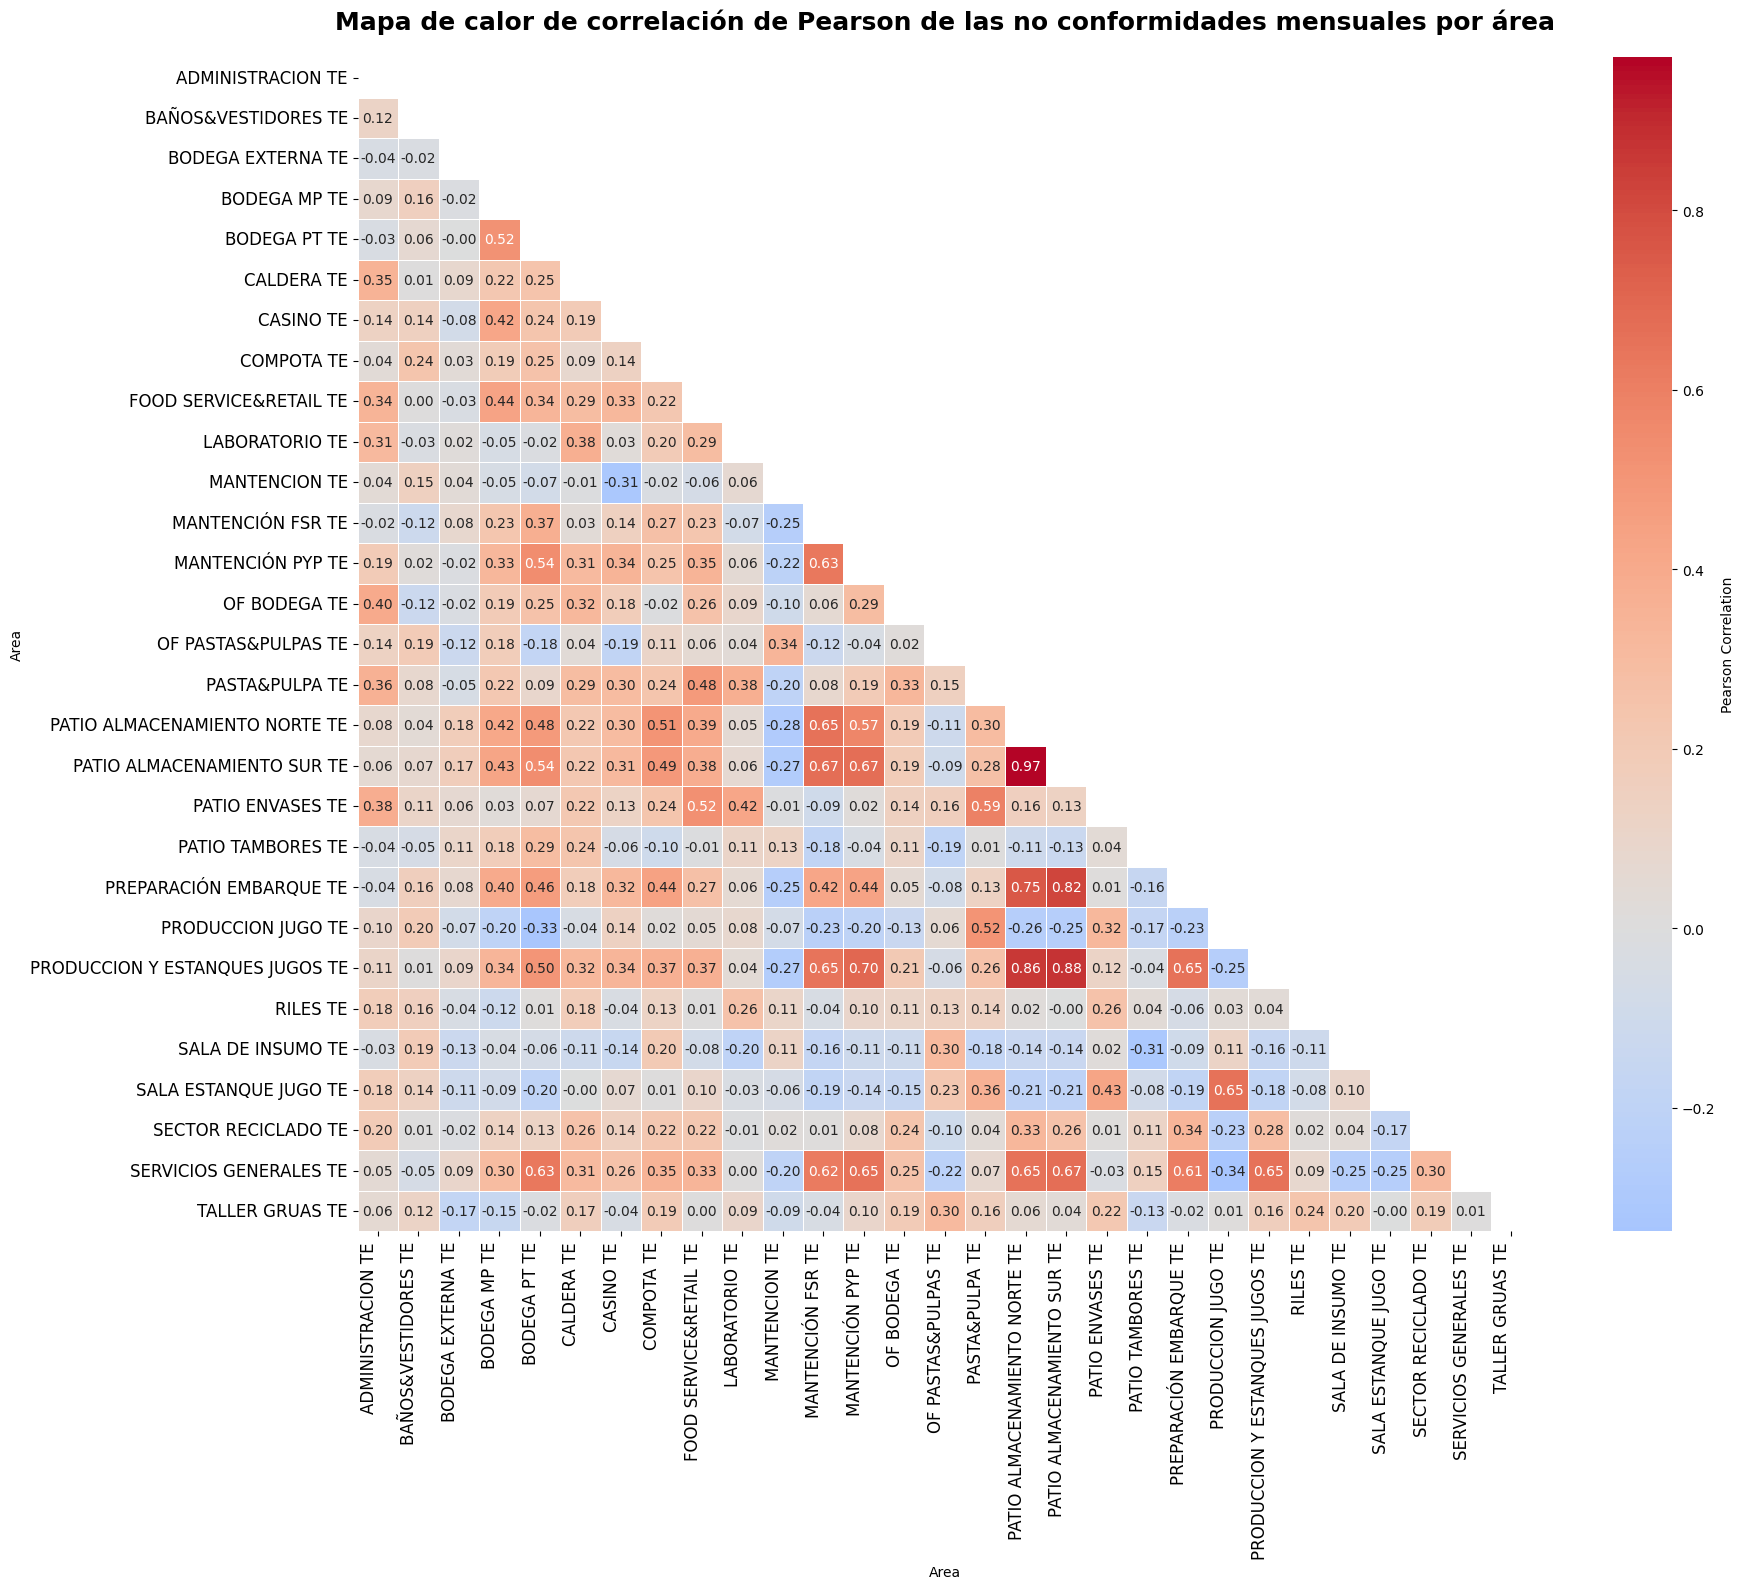

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
#     HEATMAP: PEARSON
# ----------------------------

# Crear máscara para mostrar solo la mitad inferior
mask_pearson = np.triu(np.ones_like(pearson_corr, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(
    pearson_corr,
    mask=mask_pearson,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor="white",
    center=0,
    square=True,
    cbar_kws={"label": "Pearson Correlation"}
)

plt.title(
    "Mapa de calor de correlación de Pearson de las no conformidades mensuales por área",
    fontsize=18,
    fontweight="bold",
    pad=20
)
plt.xticks(rotation=90, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

**Pares de áreas con correlaciones de Pearson fuertes (valor absoluto >= 0.7):**

- **PATIO ALMACENAMIENTO NORTE TE** y **PATIO ALMACENAMIENTO SUR TE**: Correlación de **0.97**
- **PRODUCCION Y ESTANQUES JUGOS TE** y **PATIO ALMACENAMIENTO SUR TE**: Correlación de **0.88**
- **PATIO ALMACENAMIENTO NORTE TE** y **PRODUCCION Y ESTANQUES JUGOS TE**: Correlación de **0.86**
- **PREPARACIÓN EMBARQUE TE** y **PATIO ALMACENAMIENTO SUR TE**: Correlación de **0.82**
- **PATIO ALMACENAMIENTO NORTE TE** y **PREPARACIÓN EMBARQUE TE**: Correlación de **0.75**

**Interpretación:**

Estas altas correlaciones sugieren que las tendencias de no conformidades mensuales entre estos pares de áreas se mueven de manera similar (si la correlación es positiva) o en direcciones opuestas (si es negativa) de forma bastante consistente. Esto puede indicar:
1.  **Causas Raíz Comunes:** Eventos o problemas subyacentes que afectan simultáneamente a ambas áreas.
2.  **Dependencia Operacional:** Un proceso en una área afecta directamente el rendimiento de la otra.
3.  **Factores Externos:** Influencias externas (normativas, estacionalidad) que impactan a ambas de forma similar.

Se recomienda investigar a fondo las causas de estas relaciones para implementar soluciones que puedan abordar los problemas de manera más eficiente y sistémica.

**Correlación entre FOOD SERVICE&RETAIL TE y COMPOTA TE:** 0.22
Esta correlación es débil, lo que sugiere que las no conformidades mensuales en estas dos áreas no tienen una relación lineal fuerte o consistente.

In [ ]:
spearman_corr = serie_tiempo_por_area.corr(method='spearman')

print("Spearman Correlation Matrix (first 5x5):")
print(spearman_corr.head().iloc[:, :5])

Spearman Correlation Matrix (first 5x5):
Area                 ADMINISTRACION TE  BAÑOS&VESTIDORES TE  \
Area                                                          
ADMINISTRACION TE             1.000000             0.124536   
BAÑOS&VESTIDORES TE           0.124536             1.000000   
BODEGA EXTERNA TE            -0.080281             0.024020   
BODEGA MP TE                  0.102827             0.183010   
BODEGA PT TE                 -0.027660             0.155641   

Area                 BODEGA EXTERNA TE  BODEGA MP TE  BODEGA PT TE  
Area                                                                
ADMINISTRACION TE            -0.080281      0.102827     -0.027660  
BAÑOS&VESTIDORES TE           0.024020      0.183010      0.155641  
BODEGA EXTERNA TE             1.000000      0.057210      0.071387  
BODEGA MP TE                  0.057210      1.000000      0.464689  
BODEGA PT TE                  0.071387      0.464689      1.000000  


Estas altas correlaciones de Spearman sugieren una relación monótona fuerte entre el ranking de las no conformidades mensuales de estos pares de áreas. Es decir, cuando el ranking de no conformidades sube en un área, tiende a subir (o bajar, si es negativa) en la otra de manera consistente. Esto puede indicar:

Tendencias Ordenadas Similares: Ambas áreas experimentan cambios en la cantidad de no conformidades en el mismo orden de magnitud (e.g., de meses 'bajos' a 'altos' o viceversa), aunque no necesariamente en la misma proporción absoluta.
Influencias Comunes no Lineales: Factores subyacentes que afectan a ambas áreas, cuya relación no es estrictamente lineal, pero sí sigue un patrón constante de 'más es más' o 'más es menos'.

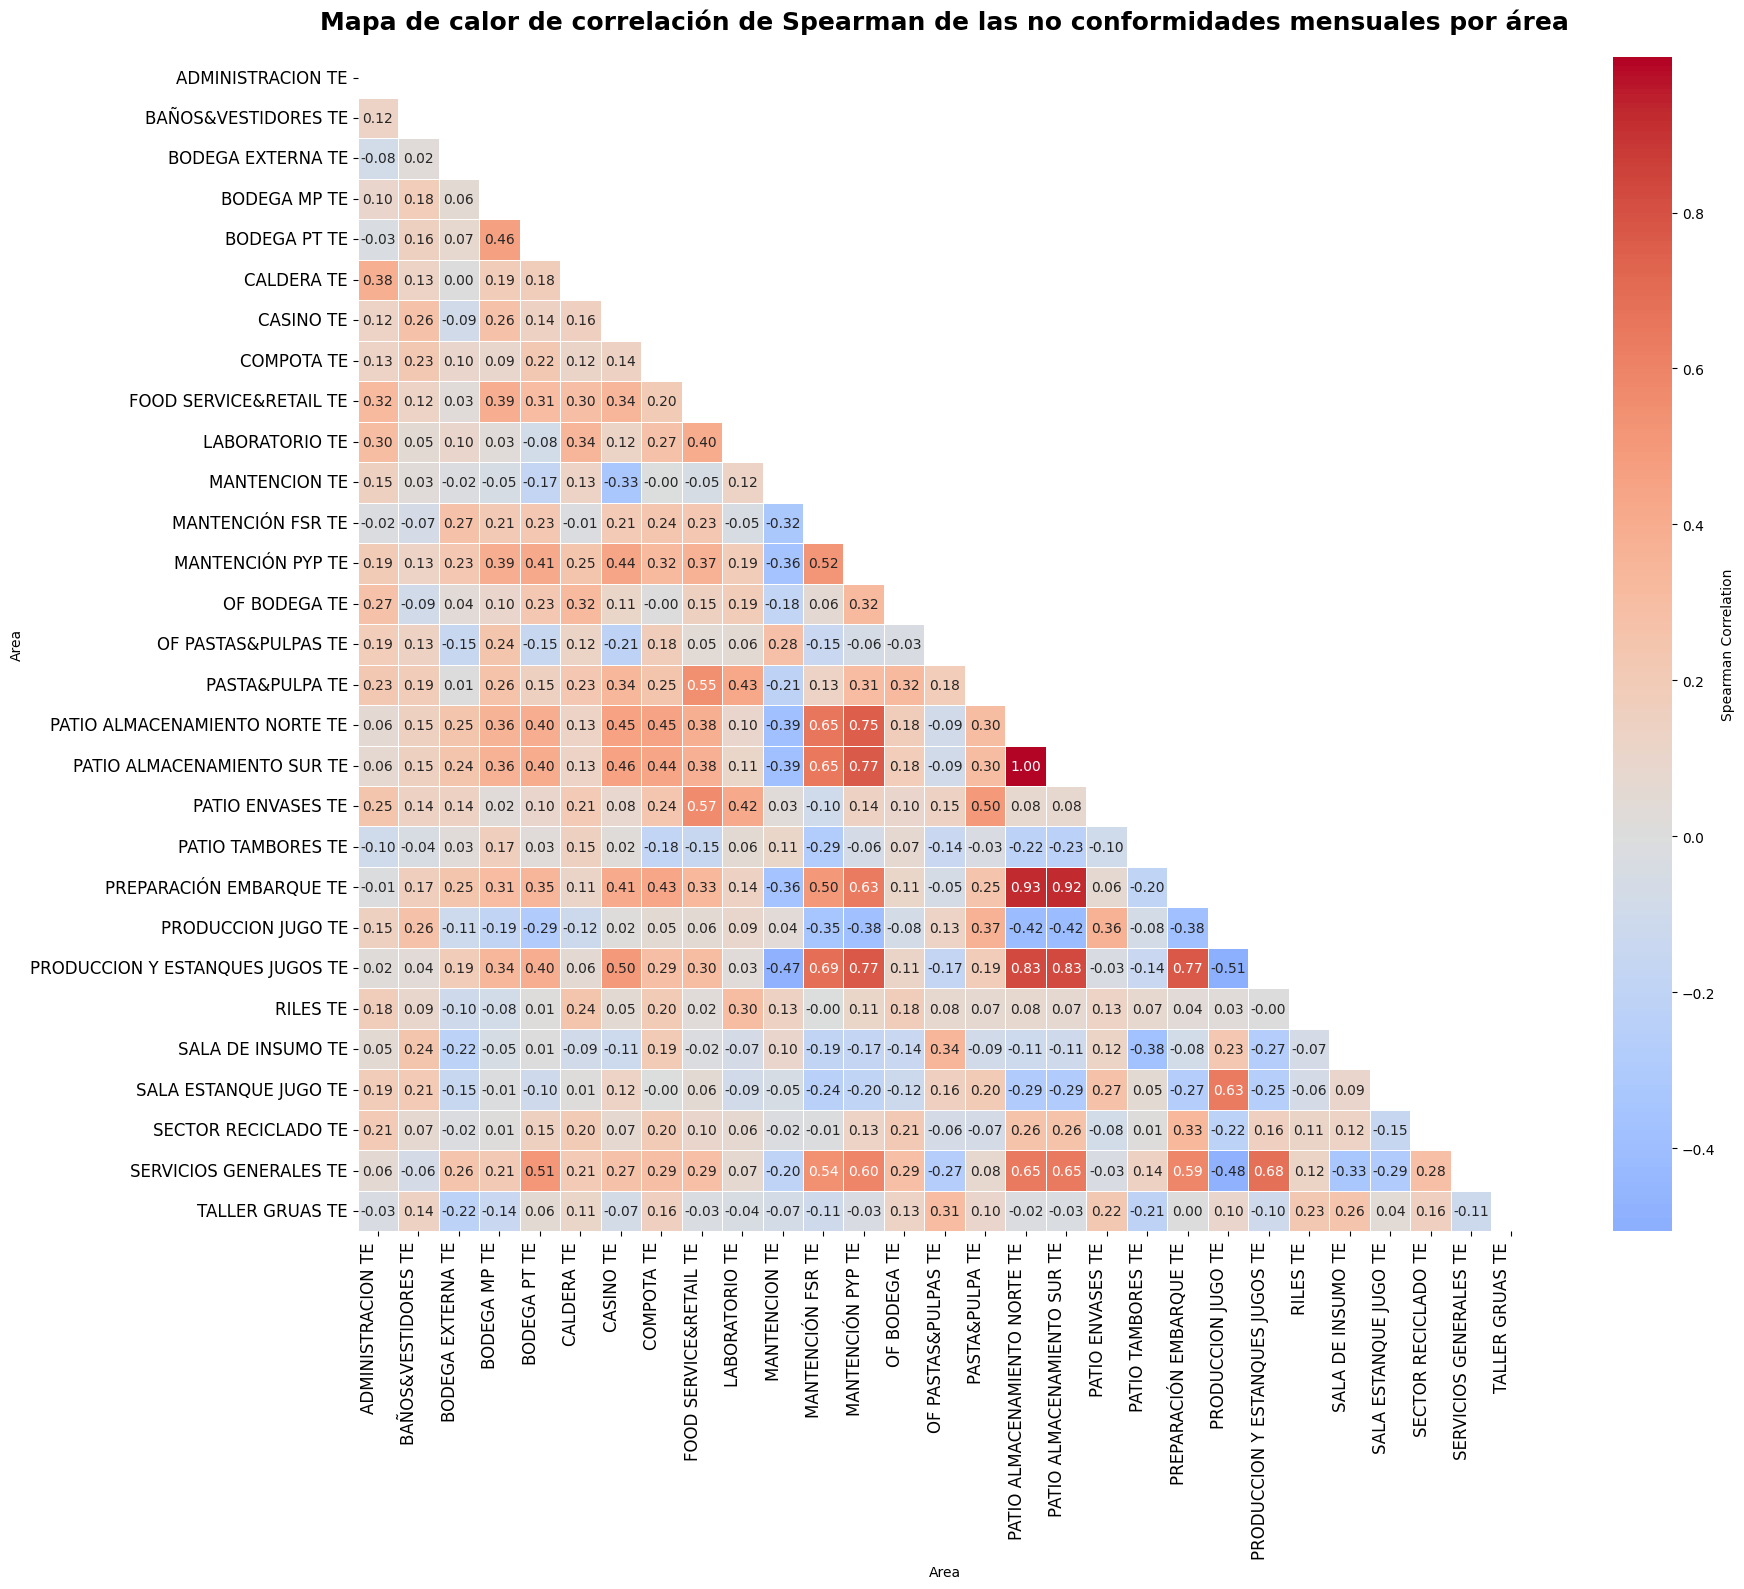

In [ ]:
#     HEATMAP: SPEARMAN
# ----------------------------

# Crear máscara para mostrar solo la mitad inferior
mask_spearman = np.triu(np.ones_like(spearman_corr, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(
    spearman_corr,
    mask=mask_spearman,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor="white",
    center=0,
    square=True,
    cbar_kws={"label": "Spearman Correlation"}
)

plt.title(
    "Mapa de calor de correlación de Spearman de las no conformidades mensuales por área",
    fontsize=18,
    fontweight="bold",
    pad=20
)
plt.xticks(rotation=90, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

**Pares de áreas con correlaciones de Spearman fuertes (valor absoluto >= 0.7):**

- **PATIO ALMACENAMIENTO NORTE TE** y **PATIO ALMACENAMIENTO SUR TE**: Correlación de **1.00**
- **PREPARACIÓN EMBARQUE TE** y **PATIO ALMACENAMIENTO NORTE TE**: Correlación de **0.93**
- **PREPARACIÓN EMBARQUE TE** y **PATIO ALMACENAMIENTO SUR TE**: Correlación de **0.92**
- **PRODUCCION Y ESTANQUES JUGOS TE** y **PATIO ALMACENAMIENTO SUR TE**: Correlación de **0.83**
- **PATIO ALMACENAMIENTO NORTE TE** y **PRODUCCION Y ESTANQUES JUGOS TE**: Correlación de **0.83**

**Interpretación:**

Estas altas correlaciones de Spearman sugieren una relación monótona fuerte entre el ranking de las no conformidades mensuales de estos pares de áreas. Es decir, cuando el ranking de no conformidades sube en un área, tiende a subir (o bajar, si es negativa) en la otra de manera consistente. Esto puede indicar:
1.  **Tendencias Ordenadas Similares:** Ambas áreas experimentan cambios en la cantidad de no conformidades en el mismo orden de magnitud (e.g., de meses 'bajos' a 'altos' o viceversa), aunque no necesariamente en la misma proporción absoluta.
2.  **Influencias Comunes no Lineales:** Factores subyacentes que afectan a ambas áreas, cuya relación no es estrictamente lineal, pero sí sigue un patrón constante de 'más es más' o 'más es menos'.


#7.-Análisis de Clústeres de No Conformidades con t-SNE

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Preparar datos para t-SNE: convertir fechas, extraer año y mes
df['Creado'] = pd.to_datetime(df['Creado'])  # Asegurar tipo datetime
df['Año'] = df['Creado'].dt.year  # Extraer año
df['Mes'] = df['Creado'].dt.month  # Extraer mes

# Seleccionar columnas relevantes para el análisis t-SNE
features = ['No Conformidad', 'Status', 'Area', 'Descrip. clase auditoría', 'Año', 'Mes']
df_working = df[features].copy()  # Copia para trabajar sin alterar df original

df_working.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Separar columnas categóricas y numéricas para preprocesamiento
categorical_features = ['Status', 'Area', 'Descrip. clase auditoría']
numerical_features = ['No Conformidad', 'Año', 'Mes']

# Crear transformador de columnas para estandarización y one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Escalar numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Codificar categóricas
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])  # Pipeline de preprocesamiento

df_scaled_array = pipeline.fit_transform(df_working).toarray()  # Aplicar transformación y convertir a array

# Convertir de nuevo a DataFrame para mayor manejabilidad
onehot_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features_processed = list(numerical_features) + list(onehot_cols)
df_scaled = pd.DataFrame(df_scaled_array, columns=all_features_processed)

# Añadir un poco de ruido para evitar problemas de t-SNE con puntos idénticos
noise_level = 0.01  # Nivel de ruido
df_scaled_noisy = df_scaled + np.random.normal(0, noise_level, df_scaled.shape)

print("df_working and df_scaled_noisy successfully created.")  # Confirmación
print(f"Shape of df_working: {df_working.shape}")  # Dimensiones del DataFrame final


df_working and df_scaled_noisy successfully created.
Shape of df_working: (8310, 6)


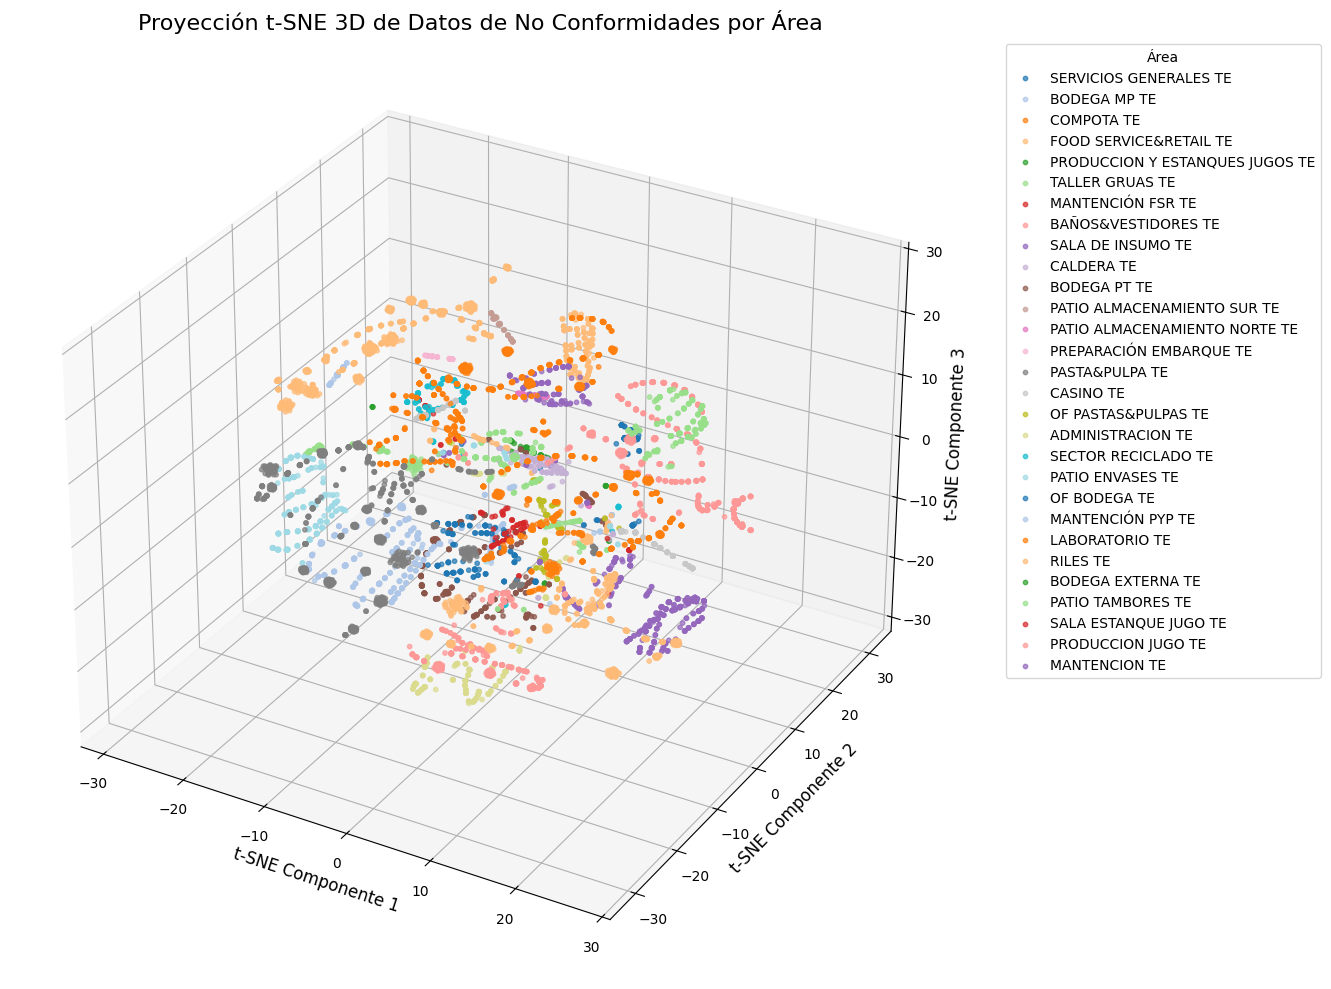

t-SNE embedding 3D visualizado exitosamente, coloreado por Área.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

# Reducir dimensionalidad a 3D usando t-SNE para visualización de datos escalados y ruidosos
tsne_reducer_3d = TSNE(n_components=3, random_state=42, perplexity=30, max_iter=1000)

tsne_embedding_3d = tsne_reducer_3d.fit_transform(df_scaled_noisy)  # Aplicar t-SNE

tsne_df_3d = pd.DataFrame(tsne_embedding_3d, columns=['TSNE_1', 'TSNE_2', 'TSNE_3'])  # DataFrame para plotting
tsne_df_3d['Area'] = df_working['Area'].reset_index(drop=True)  # Añadir columna 'Area' para colores

fig = plt.figure(figsize=(14, 10))  # Crear figura
ax = fig.add_subplot(111, projection='3d')  # Subplot 3D

unique_areas = tsne_df_3d['Area'].unique()  # Áreas únicas para colorear
palette = sns.color_palette('tab20', n_colors=len(unique_areas))  # Paleta de colores
color_map = dict(zip(unique_areas, palette))  # Mapear área a color

for area in unique_areas:  # Graficar cada área con color distinto
    subset = tsne_df_3d[tsne_df_3d['Area'] == area]
    ax.scatter(
        subset['TSNE_1'],
        subset['TSNE_2'],
        subset['TSNE_3'],
        c=[color_map[area]],  # Color de la área
        label=area,
        s=10,  # Tamaño de puntos
        alpha=0.7  # Transparencia
    )

ax.set_title('Proyección t-SNE 3D de Datos de No Conformidades por Área', fontsize=16)
ax.set_xlabel('t-SNE Componente 1', fontsize=12)
ax.set_ylabel('t-SNE Componente 2', fontsize=12)
ax.set_zlabel('t-SNE Componente 3', fontsize=12)
ax.legend(title='Área', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico

plt.tight_layout()
plt.show()

print("t-SNE embedding 3D visualizado exitosamente, coloreado por Área.")  # Confirmación


**Interpretación de la Proyección t-SNE 3D de Datos de No Conformidades por Área**
El gráfico t-SNE 3D que has generado es una herramienta poderosa para visualizar la estructura de tus datos complejos en un espacio de dimensiones reducidas (en este caso, 3 dimensiones). Su objetivo principal es:

- Preservar la estructura local: Agrupa puntos de datos que son similares en el espacio original de alta dimensión (variables como 'No Conformidad', 'Año', 'Mes', 'Día', 'Status', 'Área', 'Descripción de Clase de Auditoría') de manera que queden cerca unos de otros en la proyección 3D.
- Identificar Clústeres: Permite detectar 'grupos' o 'clústeres' de no conformidades que comparten características similares, incluso si esas similitudes no son obvias en los datos originales.
**¿Cómo interpretar el gráfico 3D?**

- 1 Nubes de Puntos (Clústeres): Cada punto en el gráfico representa una no conformidad individual. Observarás que estos puntos tienden a formar 'nubes' o 'grupos'. Los puntos dentro de una misma nube son más similares entre sí en sus características originales (año, mes, día, si hubo no conformidad, etc.) que los puntos de otras nubes.

- 2 Color por Área: Cada nube o dispersión de puntos está coloreada según la 'Área' a la que pertenece la no conformidad. Esto te permite visualizar si las no conformidades de un área específica se agrupan juntas o si se dispersan y se mezclan con no conformidades de otras áreas.

- **Áreas que forman clústeres distintivos:** Si ves que los puntos de un color particular (que representa un área) forman una nube compacta y separada de otros colores, significa que las no conformidades de esa área tienen características muy propias que las diferencian del resto. Esto podría indicar procesos, problemas o contextos muy específicos de esa área.
- **Áreas que se mezclan:** Si los puntos de diferentes colores se superponen o se mezclan en una misma región, sugiere que las no conformidades de esas áreas comparten características similares. Por ejemplo, varias áreas podrían experimentar el mismo tipo de no conformidad en el mismo período, o sus patrones temporales son muy parecidos.
- **Áreas con múltiples clústeres:** Un área podría tener sus puntos dispersos en varias nubes. Esto indicaría que las no conformidades dentro de esa misma área no son homogéneas y pueden dividirse en diferentes tipos o patrones.
- 3 Densidad de Puntos: Las regiones donde los puntos están más densamente agrupados indican una mayor concentración de no conformidades con características similares. Puedes ver dónde se 'amontonan' los incidentes más frecuentes o con patrones específicos.

- 4 Aislamiento de Puntos: Los puntos individuales o pequeños grupos que están muy alejados de las nubes principales podrían representar no conformidades atípicas o 'outliers' que tienen características únicas y no se ajustan a los patrones generales.

**Implicaciones Clave:**

- Identificación de Patrones Ocultos: t-SNE es excelente para revelar estructuras que no se verían fácilmente con un análisis bivariado o lineal.
- Agrupación de Problemas Similares: Puedes identificar grupos de no conformidades que, aunque provengan de áreas diferentes, podrían estar causadas por factores similares (por ejemplo, todas las no conformidades de 'abril de 2025' con 'status pendiente' de varias áreas se agrupan).
- Focalización de Esfuerzos: Si un área forma un clúster muy definido y alejado, podrías necesitar estrategias de mejora muy específicas para ella. Si varias áreas se mezclan en un clúster, podrías diseñar una estrategia común para abordar los problemas compartidos.
- Entender la Heterogeneidad: Te ayuda a comprender la variabilidad de las no conformidades tanto dentro como entre las áreas.
En resumen, el gráfico t-SNE 3D te ofrece una 'huella dactilar' visual de la similitud entre las no conformidades, permitiéndote detectar qué áreas o tipos de incidentes están estrechamente relacionados y cuáles son únicos, lo cual es fundamental para una gestión de calidad y toma de decisiones informada.

### Análisis de la Composición de Clústeres en la Proyección t-SNE 3D

Al examinar el gráfico t-SNE 3D de las no conformidades coloreado por 'Área', podemos hacer las siguientes observaciones:

1.  **Clústeres Distintivos y Compactos:**
    *   Algunas áreas parecen formar clústeres relativamente compactos y bien separados. Por ejemplo, `ADMINISTRACION TE` y `CASINO TE` a menudo muestran agrupaciones de puntos que son bastante homogéneas en color y están apartadas de otras áreas. Esto sugiere que los patrones de no conformidades (combinando número, status, clase de auditoría, año y mes) para estas áreas son bastante únicos y consistentes dentro de sí mismas.
    *   `SERVICIOS GENERALES TE` también forma un clúster prominente, indicando un conjunto particular de no conformidades para esta área.

2.  **Regiones de Superposición y Mezcla:**
    *   Hay varias regiones en el espacio 3D donde los puntos de diferentes colores (áreas) se mezclan considerablemente. Esto indica que las no conformidades de estas áreas comparten características similares en el espacio de alta dimensión. Por ejemplo, `COMPOTA TE`, `FOOD SERVICE&RETAIL TE`, y `PASTA&PULPA TE` (áreas que ya identificamos con un alto volumen de no conformidades en análisis previos) a menudo se encuentran en clústeres más grandes y mezclados, sugiriendo que las no conformidades en estas áreas pueden estar influenciadas por factores comunes o presentarse de maneras similares.
    *   La superposición de `PATIO ALMACENAMIENTO NORTE TE`, `PATIO ALMACENAMIENTO SUR TE`, `PREPARACIÓN EMBARQUE TE` y `PRODUCCION Y ESTANQUES JUGOS TE` en algunas regiones confirma la correlación fuerte encontrada previamente. Sus patrones de no conformidades son muy parecidos.

3.  **Áreas con Puntos Dispersos o Múltiples Clústeres:**
    *   Algunas áreas, especialmente aquellas con un gran volumen de no conformidades o procesos muy variados, pueden tener sus puntos distribuidos en varias regiones o clústeres diferentes. Esto implica una heterogeneidad en los tipos o patrones de no conformidades dentro de esa misma área. Por ejemplo, `MANTENCION TE` o `SALA DE INSUMO TE` podrían mostrar puntos distribuidos en diferentes agrupaciones, lo que indica que no todas sus no conformidades se comportan de la misma manera; pueden tener subtipos de problemas o diferentes contextos temporales.

4.  **Densidad de Puntos dentro de los Clústeres:**
    *   Los clústeres más densos (donde los puntos están muy juntos) indican una alta concentración de no conformidades con características muy similares. Estos son puntos calientes donde los problemas son recurrentes o muy específicos. Las áreas con mayor densidad en ciertos clústeres requieren una investigación más profunda para identificar la causa raíz de esa uniformidad en los incidentes.

5.  **Puntos Atípicos (Outliers):**
    *   Algunos puntos individuales o pequeños grupos aislados, alejados de los clústeres principales, pueden representar no conformidades atípicas. Estos podrían ser eventos únicos, problemas excepcionales o errores de registro. Investigar estos puntos aislados podría revelar información valiosa sobre incidentes poco comunes o situaciones extremas.

**Implicaciones:**

*   **Estrategias Específicas vs. Generales:** Los clústeres distintivos sugieren que se necesitan estrategias de mejora de procesos adaptadas a las características únicas de esa área. Las regiones mezcladas indican que una estrategia más generalizada o interdepartamental podría ser efectiva para abordar problemas comunes.
*   **Priorización de la Investigación:** La densidad y la prominencia de ciertos clústeres ayudan a priorizar qué áreas o tipos de no conformidades deben investigarse con mayor urgencia para identificar causas raíz y aplicar soluciones.


## Resumen:

### Hallazgos Clave del Análisis de Datos

* **Clusters distintos y compactos:** Áreas como `ADMINISTRACION TE`, `CASINO TE` y `SERVICIOS GENERALES TE` muestran clusters relativamente compactos y bien separados, lo que indica patrones únicos y consistentes de no conformidades específicos de estas áreas.
* **Regiones de solapamiento y mezcla:** Existen regiones notables donde las no conformidades de diferentes áreas, incluyendo `COMPOTA TE`, `FOOD SERVICE&RETAIL TE`, `PASTA&PULPA TE`, `PATIO ALMACENAMIENTO NORTE TE`, `PATIO ALMACENAMIENTO SUR TE`, `PREPARACIÓN EMBARQUE TE` y `PRODUCCION Y ESTANQUES JUGOS TE`, se mezclan. Esto sugiere características compartidas en sus patrones de no conformidades, reforzando las correlaciones identificadas previamente.
* **Clusters dispersos o múltiples:** Algunas áreas, potencialmente debido a un alto volumen o procesos variados (por ejemplo, `MANTENCION TE`, `SALA DE INSUMO TE`), muestran puntos de no conformidad distribuidos en múltiples clusters, lo que implica heterogeneidad en sus comportamientos de no conformidad.
* **Clusters densos y valores atípicos:** Los clusters densos indican una alta concentración de no conformidades similares, destacando áreas que requieren una investigación más profunda. Además, los puntos aislados o pequeños grupos representan eventos de no conformidad atípicos o únicos.

### Conclusiones o Próximos Pasos

* **Estrategias específicas vs. generales:** Desarrollar estrategias de mejora específicas y adaptadas para las áreas que forman clusters distintos. Para regiones con clusters mezclados o solapados, considerar enfoques más generales o interdepartamentales para abordar problemas subyacentes comunes.
* **Priorizar el análisis de causa raíz:** Utilizar la densidad y prominencia de clusters específicos como guía para priorizar investigaciones sobre las causas raíz de las no conformidades, enfocando los recursos donde los patrones son más pronunciados o consistentes.

